# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель исследования:**

1. Определить рыночную стоимость объектов недвижимости.
2. Построить автоматизированную систему, которая отследить аномалии и мошенническую деятельность.
3. Установить, какие факторы влияют на ценообразование стоимости квартир.

**Ход исследования.**

Данные о недвижимости я получу из файла '\real_estate_data.csv'. О качестве данных ничего не известно. Поэтому перед тем, как приступать к целям исследования, понадобится обзор данных.

Я проверю данные на ошибки и оценю их влияние на исследование.
Затем, на этапе предобработки я поищу возможность исправить все ошибки данных, которые не приведут к искажению конеечного результата. Далее, создам необходимые столбцы и приступлю к проведению исследовательского анализа.

### Откроем файл с данными и изучите общую информацию. 

####  Импортируем библиотеки и сохраняем данные в переменной data.

In [1]:
import pandas as pd #импортируем библиотеку Pandas

import matplotlib.pyplot as plt #импортируем библиотеку Matplotlib для построения графиков/диаграмм/гистограмм и т.д.

import numpy as np # импортируем библиотеку numpy

In [2]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') #читаем csv-файл
except:
    pass

#### Изучаем общую информацию о полученном датафрейме.

In [ ]:
data.head(10) #выводим на экран первые 10 строк датафрейма data

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0      108.00  2019-03-07T00:00:00      3   
1             7   3350000.0       40.40  2018-12-04T00:00:00      1   
2            10   5196000.0       56.00  2015-08-20T00:00:00      2   
3             0  64900000.0      159.00  2015-07-24T00:00:00      3   
4             2  10000000.0      100.00  2018-06-19T00:00:00      2   
5            10   2890000.0       30.40  2018-09-10T00:00:00      1   
6             6   3700000.0       37.30  2017-11-02T00:00:00      1   
7             5   7915000.0       71.60  2019-04-18T00:00:00      2   
8            20   2900000.0       33.16  2018-05-23T00:00:00      1   
9            18   5400000.0       61.00  2017-02-26T00:00:00      3   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0        51.00      8          NaN  ...   
1             NaN          11.0        18.60      1          NaN  ...   

In [4]:
data.info() #выводим для изучения основную информацию о датафрейме с помощью метода info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### Для того чтобы поближе познакомится с данными, строим общую гистограмму для всех числовых столбцов таблицы.

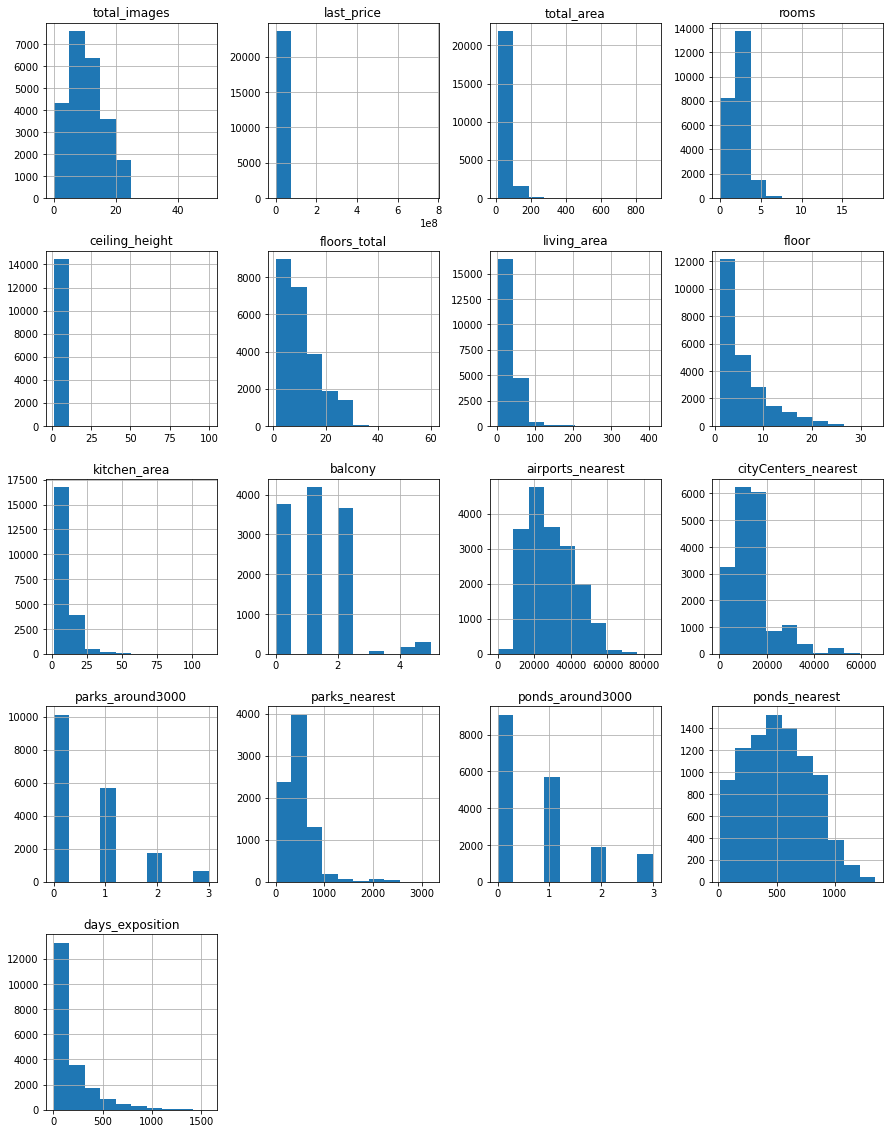

In [5]:
data.hist(figsize=(15, 20)); #строим гистограммы для первичного анализа

* **Краткий вывод:**

Функция .hist() вывела на экран всего 3 гистограммы.\
Это связано с тем, что только у трех столбцов в данной таблице "числовой" тип данных.

\
Для того, чтобы подробнее рассмотреть данные по всем столбцам в таблице, нам необходимо будет обработать данные.

### Предобработка данных

#### Для начала найдем и изучим пропущенные значения в столбцах.

In [6]:
data.isna().sum() #выводим кол-во нулевых значений в столбцах

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Проверить колличество пропусков в % можем вот так: 

In [7]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm') # Смотрим на кол-во пропусков в %

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


Можно заметить, что в 14 столбцах есть отсутствующие данные.

Попробуем поближе познакомится с этими столбцами.\
**ceiling_height**   -   высота потолков\
**floors_total**     -   всего этажей в доме\
**living_area**      -   жилая площадь\
**is_apartment**     -   аппартаменты\
**kitchen_area**     -   площадь кухни\
**balcony**          -   число балконов\
**locality_name**    -   название населенного пункта\
**airports_nearest** -   расстояние до ближайшего аэропорта\
**cityCenters_nearest** - расстояние до центра города\
**parks_around3000** -   число парков в радиусе 3км\
**parks_nearest**    -   расстояние до ближайшего парка\
**ponds_around3000** -   число водоемов в радиусе 3км\
**ponds_nearest**    -   расстояние до ближайшего водоема\
**days_exposition**  -   сколько дней было размещено объявление

Можно слелать предположение, что если продавец не указал, к примеру, число балконов, то, скорее всего, в его квартире их нет.\
Такие пропуски будет правильно заменить на 0.\
Если же логичную замену предложить будет невозможно, то оставим данные значения пустыми, так как пропуски - это тоже важный сигнал, который нужно учитывать.

* Для начала сделаем предположения в связи с чем могли возникнуть пропуски и выберем столбцы, в которых отсутствующие значения можно будет заменить на 0.

**ceiling_height**   -   высота потолков --- (вероятно, что продавцы просто не знали и/или не могли измерить высоту потолков в продаваемой квартире\
**floors_total**     -   всего этажей в доме --- (возможно данные были просто потеряны в ходе выгрузки)\
**living_area**      -   жилая площадь --- (возможно также произошла ошибка при выгрузке данных)\
**is_apartment**     -   аппартаменты --- (предполагаем, что пропуски в данном столбце могут быть связаны с тем, что данные помещения не являются аппартаментами, и продавцы просто решили оставить данные ячейки пустыми)\
**kitchen_area**     -   площадь кухни --- (вероятно, что площадь кухни не была прописана отдельно так как данные квартиры являлись однокомнатными аппартаментами, и как следствие, площадь кухни не считалась отдельно, а была прибавлена к общей площади)\
**balcony**          -   число балконов --- (предполагаем, что продавец не указал число балконов, так как их нет вообще в квартире)\
**locality_name**    -   название населенного пункта --- (пропуск в данном столбце может быть связан скорее всего с ошибкой, при выгрузке данных, либо с тем, что продавец специально решил скрыть местонахождение объекта)\
**airports_nearest** -   расстояние до ближайшего аэропорта ---(в данном столбце пропуск может быть связан с тем, что поблизости с квартирой нет аэропорта)\
**cityCenters_nearest** - расстояние до центра города --- (здесь, вероятно, пропуск связан с тем, что квартира находится либо слишком далеко от центра, либо находится за территорией города. Но скорее всего ошибка из-за выгрузки данных с карт)\
**parks_around3000** -   число парков в радиусе 3км --- (Можно предположить, что отсутствие значений в данном столбце связано с отсутствием парков в радиусе 3 км. Либо также ошибка выгрузки данных)\
**parks_nearest**    -   расстояние до ближайшего парка --- (если же рядом парков нет, то и измерить расстояние до ближайшего парка не очень простое занятие, скорее всего продавцы просто не захотели заполнять данный столбец, либо, есть вероятность, что пропуски в данном столбце связаны с тем, что возле квартиры несколько парков и не было понятно, какое именно расстояние писать. Опять же, скорее всего ошибка из-за выгрузки данных)\
**ponds_around3000** -   число водоемов в радиусе 3км --- (также как и с парками. Склоее всего в радиусе 3км отсутствуют водоемы. Либо ошибка выгрузки данных)\
**ponds_nearest**    -   расстояние до ближайшего водоема --- (также как и парками. если рядом водоемы отсутствуют то и измерять расстояние до ближайшего парка невозможно, либо, есть вероятность, что пропуски в данном столбце связаны с тем, что возле квартиры несколько водоемов и не понятно, какое именно расстояние писать в данном столбце. Ошибка выгрузки данных.)\
**days_exposition**  -   сколько дней было размещено объявление --- (может быть много причин, почему данные в этих столбцах отсутствуют: Вероятнее всего - ошибка выгрузки данных.

Изучив структуру данных подробнее, сделаем предположения, что отсутствующие данные в следующих столбах можно заменить на нулевые значения:

balcony\
parks_around3000\
ponds_around3000

In [8]:
data['balcony'] = data['balcony'].fillna(0) # Заполняем пропущенные значения в столбце 'balcony' на нулевые

In [9]:
# Заполняем пропущенные значения в столбце 'parks_around3000' на нулевые

data['parks_around3000'] = data['parks_around3000'].fillna(0)

In [10]:
# Заполняем пропущенные значения в столбце 'ponds_around3000' на нулевые

data['ponds_around3000'] = data['ponds_around3000'].fillna(0) 

In [11]:
data.isna().sum() # Проверяем, что пропущенные значения в данных столбцах отсутствуют.

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

Оставшиеся столбцы с пропущенными значениями пока что оставим без изменений.


Мы вернемся к ним позже, когда изучим данные лучше и уже потом решим что делать с данными пропусками.

Если пропусков меньше 5-10% их лучше сразу удалить, дабы сэкономить время




#### Рассмотрим типы данных в каждом столбце:

Для начала ещё раз выведем функцию .info() для того, чтобы увидеть типы данных в таблице.

In [12]:
data.info() #выводим для изучения основную информацию о датафрейме с помощью метода info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

* Найдем столбцы, в которых нужно изменить тип данных.

Изучив таблицу, мы приходим к выводу, что в большей части столбцов необходимо будет изменить тип данных на числовой\
в одном из столбцов тип необходимо будет поменять на временной,\
в одном из столбцом тип необходимо будет поменять на булевый/логический


Здесь меняем тип данных на числовой:\
last_price\
total_area\
ceiling_height\
floors_total\
living_area\
kitchen_area\
balcony\
airports_nearest\
cityCenters_nearest\
parks_around3000\
parks_nearest\
ponds_around3000\
ponds_nearest\
days_exposition

Здесь меняем тип данных на временной:\
first_day_exposition

Здесь меняем тип данных на булевый/логический:\
is_apartment



* Преобразуем тип данных на числовой:

In [13]:
data[['total_area', 'ceiling_height', 'living_area', 'kitchen_area', 'airports_nearest', 'cityCenters_nearest', 
'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition',
'floors_total', 'last_price', 'balcony']]= data[['total_area', 'ceiling_height','living_area', 'kitchen_area', 
'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 
'days_exposition', 'floors_total', 'last_price', 'balcony']].astype(float)
#во всех перечисленных столбцах меняем тип данных на числовой (float)

In [14]:
#data['floors_total'] = data['floors_total'].fillna(0).astype('int')
#data['balcony'] = data['balcony'].fillna(0).astype('int')
# Не понимаю почему - тренажер не позволяет поменять тип данных на int. Ну и ладно.

* Преобразуем тип данных на временной:

In [15]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d %H:%M')

* Преобразуем тип данных на булевый/логический:

In [16]:
data['is_apartment']=data['is_apartment'].astype(bool) # меняем тип на булевый/логический

Убедимся, что тип данных изменился. Для этого снова вызовем функцию .info()

In [17]:
data.info() # Вызываем функцию .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

* Как видим, типы данных в таблице изменились.


 * На вопрос, зачем нужно было менять типы данных ответ простой:\
**Тип данных необходимо было поменять, чтобы с этими данными можно было работать (проводить первичный анализ)**.\
Строковый/текстовый тип данных не позволяет нормально работать с данными (складывать, умножать, делить числа, искать медианы, строить графики и т.д).\
После преобразования данных у нас появляется возможность с этими числовыми данными работать (складывать, вычитать, делить числа, искать медианы, строить графики и т.д.)

In [18]:
data['floors_total'] = data['floors_total'].fillna(0).astype('int') # меняем тип данных на int

In [19]:
data['balcony'] = data['balcony'].fillna(0).astype('int') # меняем тип данных на int

In [20]:
# data.info() # Вызываем функцию .info() - можно проверить, и убедиться, что тип изменился. (в этот раз)

#### Изучим уникальные значения в столбцах и устраним неявные дубликаты.

В нашей таблице присутствует только один столбец, в котором могут скрываться неявные дубликаты.\
Это столбец с текстовыми значениями, а именно:\
Название населенного пункта - **['locality_name']**

Для начала приведем все данные к нижнему регистру.

In [21]:
data['locality_name'] = data['locality_name'].str.lower() # приводим данные в этом столбце к нижнему регистру

Теперь изучим уникальные значения в данном столбце.

In [22]:
data['locality_name'].unique() # Изучаем все уникальные названия в столбце ['locality_name']

array(['санкт-петербург', 'посёлок шушары', 'городской посёлок янино-1',
       'посёлок парголово', 'посёлок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина', 'поселок мурино',
       'деревня фёдоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'посёлок металлострой',
       'посёлок городского типа лебяжье',
       'посёлок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'посёлок аннино',
       'поселок городского типа ефимовский', 'посёлок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'посёлок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', '

In [23]:
data['locality_name'].nunique() # Считаем количество всех уникальные названий в столбце ['locality_name']

364

Как видим, всего у нас имеется 364 уникальных значения в данном столбце, однако среди них определенно есть неявные дубликаты.\
Например "поселок Рябово" и "посёлок городского типа Рябово".\
Попробуем выявить все неявные дубликаты и попробуем их устранить.

Для начала заменим все буквы "ё", на буквы "е", соблюдая нижний регистр.\
Для этого воспользуемся функцией str.replace()

In [24]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

Проверим, прошли ли изменения.

In [25]:
data['locality_name'].unique() # Проверим прошли ли изменения. Всё сработало.

array(['санкт-петербург', 'поселок шушары', 'городской поселок янино-1',
       'поселок парголово', 'поселок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина',
       'деревня федоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'поселок металлострой',
       'поселок городского типа лебяжье',
       'поселок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'поселок городского типа ефимовский', 'поселок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'поселок новый свет

Затем заменим все словосочитания "поселок городского типа" и "городской поселок" на "поселок"

In [26]:
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок')

Убедимся, что неявные дубликаты были убраны.\
Для этого снова посмотрим на количество уникальных значений в данном столбце.

In [27]:
data['locality_name'].nunique() # Повторно смотрим количество уникальных значений в столбце 'locality_name'

322

Осталось только убрать убрать явные дубликаты, если они имеются.\
В этом нам поможет функция - .drop_duplicates()

In [28]:
data['locality_name'].drop_duplicates().reset_index(drop=True) # удаляем Явные дубликаты из данного столбца (если они есть)

0                санкт-петербург
1                 поселок шушары
2                поселок янино-1
3              поселок парголово
4                 поселок мурино
                 ...            
318               деревня нижняя
319    коттеджный поселок лесное
320            деревня тихковицы
321       деревня борисова грива
322         поселок дзержинского
Name: locality_name, Length: 323, dtype: object

Насколько можем судить - явных дубликатов в данном столбце нет.\
Но в любом случае, лучше в этом убедиться наверняка.

-**Краткий итог:**\
Количество уникальных значений до устранения дубликатов было 364.\
После их устранения осталось 322.\
Отлично.\
***Явные и неявные дубликаты были устранены.***\
В случае, если в дальнейшем обнаружатся ещё какие-либо неявные дубликаты, мы можем устранить и их.\
А в данный момент имеем 322 уникальных значения и пропуски.\
Пропуски пока что удалять не будем, т.к. возможно эти данные в дальнейшем нам ещё пригодятся.

#### Найдем и устраним редкие и выбивающиеся значения. (минимумы и максимумы)

Для того, чтобы лучше ознакомится с данными и найти редкие выбивающиеся значения, построим обновленные гистрограммы по всему датафрейму и несколько диаграмм размаха.

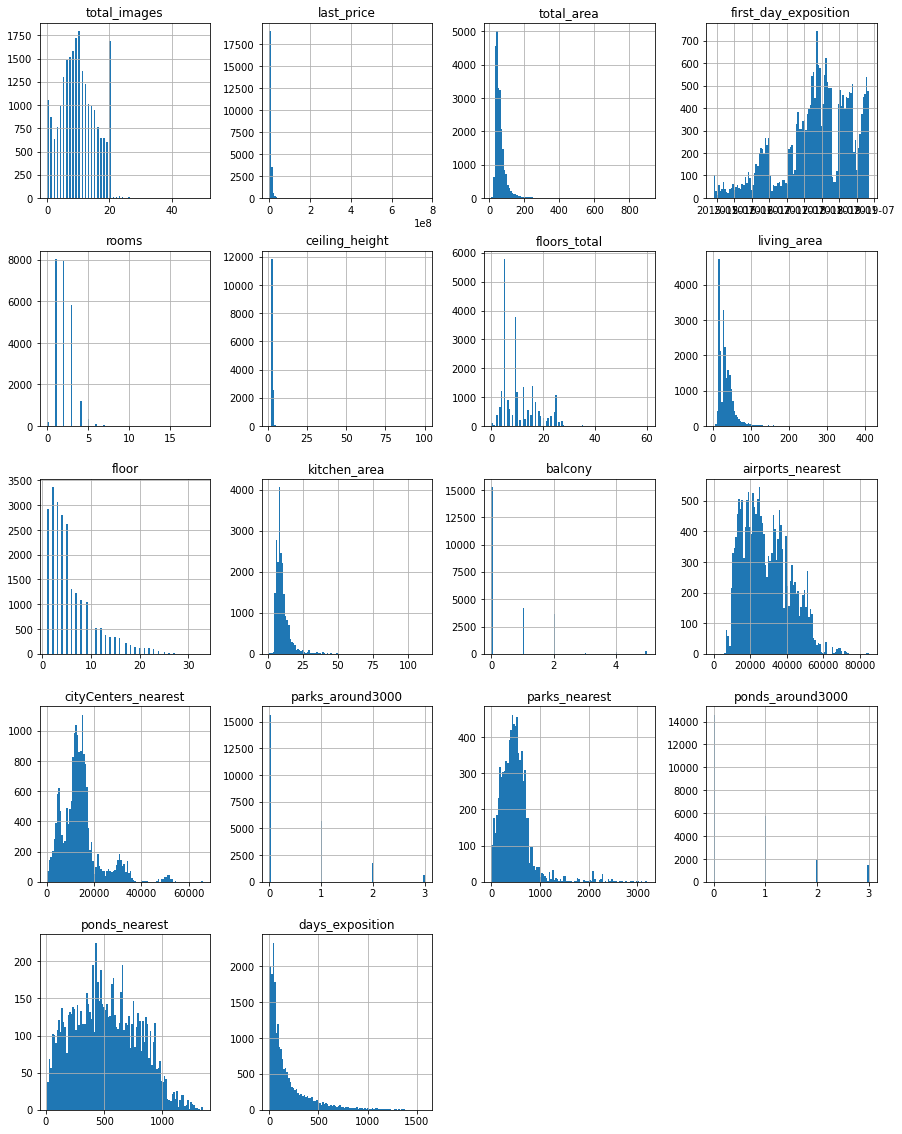

In [29]:
data.hist(bins=100, figsize=(15, 20));

Изучим данные немного подробнее, построив диграммы размаха.

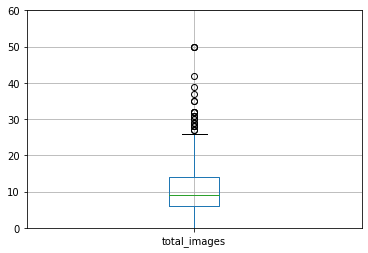

In [30]:
data.boxplot('total_images') #диаграмма размаха для количества фотографий квартиры
plt.ylim(0, 60);
#странно, что кто=то решил выложить 50 фотографий помещения, но такое вполне возможно.
#в данный момент значения в этом столбце существенно не повлияют исследование.
#здесь ничего не меняем.

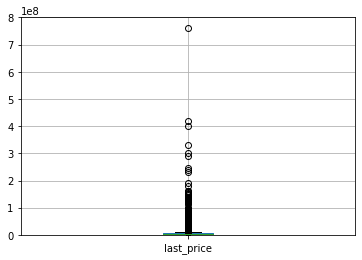

In [31]:
data.boxplot('last_price') #диаграмма размаха для цены квартиры
plt.ylim(0, 800000000);
#почти 800 миллионов кто-то из продавцов просит за свою квартиру.
#что делать с этим максимальным значением решим дальше, а пока посмотрим на остальные диаграммы размаха.

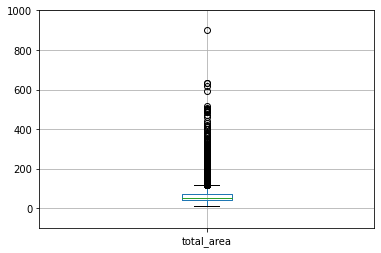

In [32]:
data.boxplot('total_area') #диаграмма размаха для общей площади квартиры
plt.ylim(-100, 1000);
#900 квадратных метров. Интересная площадь...
#данный столбец тоже будем редактировать.

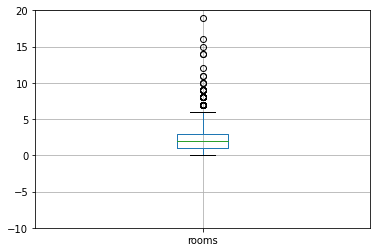

In [33]:
data.boxplot('rooms') #диаграмма размаха для количества комнат в квартире
plt.ylim(-10, 20);
#вроде ничего необычного. 19 комнатные квартиры тоже бывают...

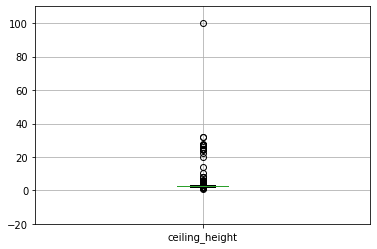

In [34]:
data.boxplot('ceiling_height') #диаграмма размаха для высоты потолков 
plt.ylim(-20, 110);
#неплохо....высота потолков 20-30 и даже 100 метров.... я уже представляю эти дворцы!!! (шутка)
#конечно же здесь явно кроется ошибка....или вернее ошибки. Будем их исправлять.

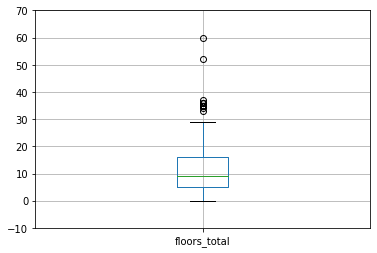

In [35]:
data.boxplot('floors_total') #диаграмма размаха для количества этажей в зданий
plt.ylim(-10, 70);
#60 этажные здания...открываем Википедию....удостовериваемся что такие дома в Питере существуют...
#Решаем отложить вопрос о том, что делать с этими данными значениями на потом.

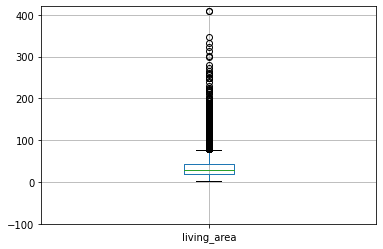

In [36]:
data.boxplot('living_area') #диаграмма размаха для жилой площади
plt.ylim(-100, 420);
#очень много значений превышающих 100 квадратных метров...

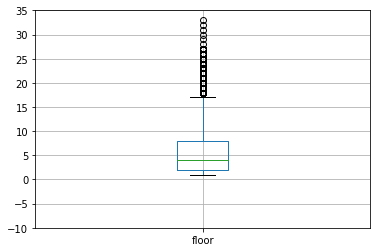

In [37]:
data.boxplot('floor') # диаграмма размаха для этажа
plt.ylim(-10, 35);
#в принципе ничего не обычного. 30 этаж, 34 этаж. Пока оставляем всё как есть

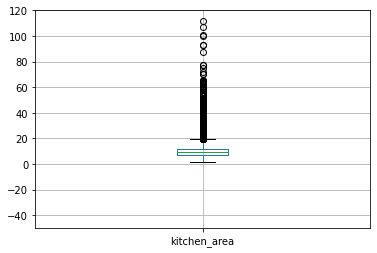

In [38]:
data.boxplot('kitchen_area') #диаграмма размаха для площади кухни
plt.ylim(-50, 120);
# есть большие кухни. Что делать с ними решим позже.

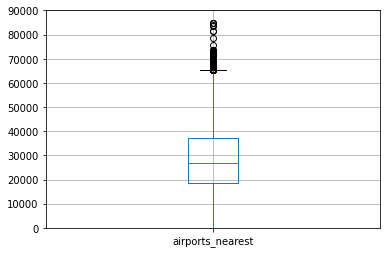

In [39]:
data.boxplot('airports_nearest') #диаграмма размаха для ближайшего аэропорта
plt.ylim(0, 90000);
#учитывая, что расстояния в данном столбце указаны в метрах, в принципе не удивительно, что ближайшие аэропорты
#находятся на таком расстоянии. Максимальное расстояние 90 км. Вполне адекватные значения.(хоть и далековато)

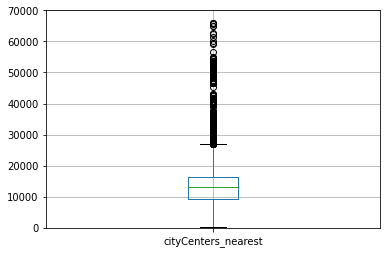

In [40]:
data.boxplot('cityCenters_nearest') #диаграмма размаха для расстояния от центра города до квартиры
plt.ylim(-100, 70000);
# в 70 км от центра города....далековато от центра Питера....но ничего необычного.

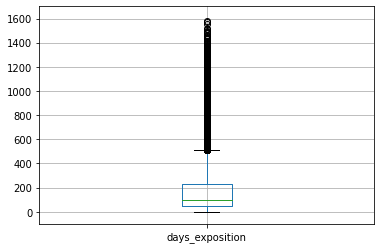

In [41]:
data.boxplot('days_exposition') #диаграмма размаха для количества дней размещенного объявляения
plt.ylim(-100, 1700);
# некоторым объявлением уже почти по 5 лет. Почему бы и нет, раз нет покупателей ?

Рассмотрев наиболее из интересных диаграмм размаха - решаем, что как минимум в одном из столбцов явно указаны некорректные данные.
Попробуем для начала обработать значения в столбце **'ceiling_height'** - (высота потолков)

Сравним значения диграммы размаха по столбцу **'ceiling_height'** с его числовым описанием.

In [42]:
print(data['ceiling_height'].describe()) #функцией describe() вызываем числовое описание диаграммы размаха

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


Нда. потолок 100 метров. мечта....или наказание ?\
А потолок с высотой 1м ?\
Да и медианное значение в 1.69 нам не очень подходит.\
Не важно.\
С такими данными работать не получится.\
Придется обработать эти значения.\
Давайте, для удобства, ещё раз выведем диаграмму размаха, но только для данного столбца.\
Значение высоты потолка в 100 метров - явно неверное, однако попробуем взглянуть на данные в другом масштабе (не учитывая 100 метровый потолок).

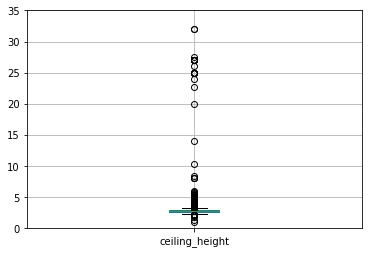

In [43]:
data.boxplot('ceiling_height') #диаграмма размаха для высоты потолков в диапазоне до 35 метров
plt.ylim(0, 35);


Большая часть значений, как и следовало ожидать находится в пределах 10 метров, однако, как мы видим, 
есть большое количество данных в пределах от 20 до 35 метров. А также есть значения потолка в 0 и 1 м, что тоже не корректно.
Можем сделать предположение, что продавцы квартир просто напросто забыли поставить точку или запятую, и их значения получились в 10 раз больше...или же в 10 раз меньше.... 

Давайте взглянем на строку, где у нас потолок высотой в 100метров - целиком. Воспользуемся для этого функциями print(data.loc..)

In [44]:
print(data[data['ceiling_height'] == 100])

       total_images  last_price  total_area first_day_exposition  rooms  \
22869             0  15000000.0        25.0           2018-07-25      1   

       ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
22869           100.0             5         14.0      5          True  ...   

       kitchen_area  balcony    locality_name  airports_nearest  \
22869          11.0        5  санкт-петербург           34963.0   

      cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
22869              8283.0               1.0          223.0               3.0   

       ponds_nearest  days_exposition  
22869           30.0             19.0  

[1 rows x 22 columns]


Видим, что у нас однакомнатная квартира, (а вернее аппартаменты), с общей площадью в 25 кв. метров и жилой площадью в 14 кв.метров, расположенные на 5 этаже 5ти этажного здания, и имеющие 5 балконов. Цена этой квартиры 15 миллионов. Расположена в 8 км от центра Санкт-Петербурга. Очень интересно.\
Что же делать с этим значением ?!? 
Удалять эти данные не хочется, но видимо придется.\
Чтобы данный выброс не менял общую картину - мы данной строке придадим значение NaN.

А пока ещё раз посмотрим на срез данных без учета 100 метрового потолка, но с другого ракурса.

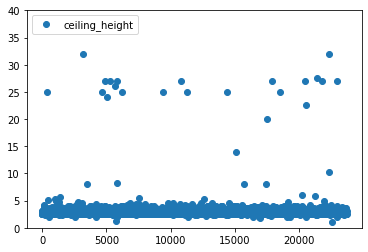

In [45]:
data.plot(y='ceiling_height', style='o', ylim=(0, 40));

Здесь уже отчётливо видим, что большая часть нужных нам данных находится в пределах от 2 до 8 метров.\
Однако также замечаем, что у нас есть очень много нулевых значений.\
Так как по условиям задачи нам необходимо удалить все редкие и выбивающиеся значения - будем считать нормальными только значения в пределах от 2 до 8 метров.\
Остальные значения попробуем обработать функцией со следующей логикой:\
    - Если высота потолка равна 100 метров или меньше 1.6 метров - заменим эти значения на NaN.\
    - Если высота потолка больше 16 метров - уменьшаем значения в 10 раз.\
    - Если высота потолка находится в пределах от 8 до 16 - также заменим эти значения на NaN.\
    - В оставшихся случаях оставим высоту потолка такой, какая есть.

In [46]:
def anomalies_ceiling_height(value): #создаем функцию anomalies с перебором по значениям value (логика описана выше по тексту)
    try: 
        if value == 100 or value < 1.6:
            return NaN
        elif value > 16:
            return value/10
        elif 16 > value >= 8: 
            return NaN
        else:
            return value
    except:
        pass

Теперь применяем данную функцию к новому столбцу 'new_ceiling_height'

In [47]:
data['new_ceiling_height'] = data['ceiling_height'].apply(anomalies_ceiling_height) 
#создаем новый столбец и придаем ему значения с использованием функции (.apply) к столбцу 'ceiling_height'

In [48]:
data['new_ceiling_height'] = data['new_ceiling_height'].dropna() #удаляем все пропущенные(NaN) значения

In [49]:
print(data['new_ceiling_height'].describe()) #функцией describe() снова вызываем числовое описание диаграммы размаха

count    14495.000000
mean         2.726556
std          0.278811
min          1.750000
25%          2.510000
50%          2.650000
75%          2.800000
max          6.000000
Name: new_ceiling_height, dtype: float64


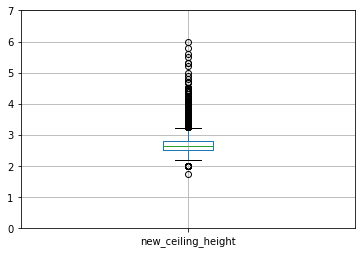

In [50]:
data.boxplot('new_ceiling_height') #снова строим диаграмму размаха для высоты потолков 
plt.ylim(0, 7);


* **Краткий вывод:**

C высотой потолков ('new_ceiling_height') разобрались, если можно так выразится.\
Теперь всё похоже на правду.\
Медианное значение высоты потолков около 2.72 метров.\
Стандартное отклонение около 0.27 метров.\
Все редкие и выбивающиеся значения удалили, но так, чтобы эти удаления не сильно повлияли на общую картину.\
Можно ли считать, что мы с более-менее адекватной точностью определили среднюю высоту потолков ?\
Конечно же нет, учитывая, что в данном столбце из 23 699  значений - у нас 9195 пропущенных значений. (А это означает, как минимум, что погрешность в наших расчетов составляет 38,8%).\
Так что мы делаем огромное допущение когда говорим что медианное значение высоты наших полотков составляет 2.72 метра.\
Эти данные верные с вероятностью лишь 61,2%.


Но прежде чем писать окончательные выводы давайте ещё раз посмотрим на ту загадочную квартиру с ценой почти 800 миллионов и на квартиру с общей площадью почти в 900 кв. метров.\
Попытаемся понять, один ли это объект или несколько, и при необходимости удалим и эти редкие выбивающиеся значения.

В этом нам всё также помогут функции print и .loc

In [51]:
print(data.loc[data['last_price'] > 700000000]) # выводим на экран строку, где цена квартиры более 700 миллионов

       total_images   last_price  total_area first_day_exposition  rooms  \
12971            19  763000000.0       400.0           2017-09-30      7   

       ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
12971             NaN            10        250.0     10          True  ...   

       balcony    locality_name  airports_nearest  cityCenters_nearest  \
12971        2  санкт-петербург           25108.0               3956.0   

      parks_around3000  parks_nearest  ponds_around3000  ponds_nearest  \
12971              1.0          530.0               3.0          756.0   

       days_exposition  new_ceiling_height  
12971             33.0                 NaN  

[1 rows x 23 columns]


Интересно.\
400 кв.метров общая площадь. 7 комнат. Аппартаменты. 2 балкона. в 4 км от центра Санкт-Петербурга. 10ый этаж в 10 этажном здании.\
В теории - это может быть правдой. А раз ошибки тут нет, то и не понятно как это исправлять.\
Единственное решение которое приходит на ум, не учитывать эти аномальные значения, чтобы они не искажали общую картину.

Посмотрим на числовые значения диаграммы размаха и на то, какие средние значения она нам предлагает.

In [52]:
print(data['last_price'].describe()) #смотрим на числовые значения диаграммы размаха

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64


Взглянем на общую картину диаграммы рассеивания, однако ограничим максимальную сумму за квартиру в 100 миллионов.

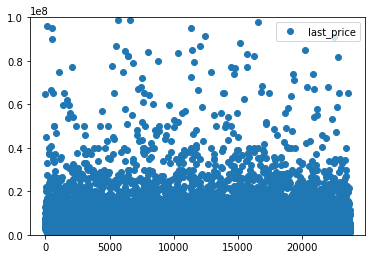

In [53]:
data.plot(y='last_price', style='o', ylim=(0, 100000000)); #строим диаграмму рассеивания. Верхнюю границу ставим в 100 млн.

Да уж.\
Квартиры с ценой около 100 миллионов тоже не такие уж редкие, как хотелось бы, однако их существенно меньше, чем квартир с ценой до 40 миллионов.

Давайте посмотрим сколько всего у нас квартир стоимостью больше 40 миллионов.

In [54]:
print(data.loc[data['last_price'] > 40000000].count()) # выводим кол-во квартир ценою более 40 миллионов

total_images            182
last_price              182
total_area              182
first_day_exposition    182
rooms                   182
ceiling_height          117
floors_total            182
living_area             160
floor                   182
is_apartment            182
studio                  182
open_plan               182
kitchen_area            159
balcony                 182
locality_name           182
airports_nearest        176
cityCenters_nearest     179
parks_around3000        182
parks_nearest           139
ponds_around3000        182
ponds_nearest           148
days_exposition         140
new_ceiling_height      117
dtype: int64


Получили около 180 квартир. Это примерно менее 1% от общей выборки данных.

Теперь посмотрим сколько у нас квартир ценой менее 500 тысяч.

In [55]:
print(data[data['last_price'] < 500000].count()) # выводим кол-во квартир с ценой до 500 тысяч

total_images            14
last_price              14
total_area              14
first_day_exposition    14
rooms                   14
ceiling_height           3
floors_total            14
living_area              9
floor                   14
is_apartment            14
studio                  14
open_plan               14
kitchen_area             8
balcony                 14
locality_name           14
airports_nearest         1
cityCenters_nearest      1
parks_around3000        14
parks_nearest            1
ponds_around3000        14
ponds_nearest            0
days_exposition         13
new_ceiling_height       3
dtype: int64


Получили всего 14 квартир. (это меньше чем 0,06 от общей выборки).

Итак. Мы рассмотрели гистограмму 'last_price', диаграмму рассеивания 'last_price', а также посчитали общее количество квартир, стоимостью больше 40 млн. и меньше 500 тысяч (менее ~1%)\
На основании всего вышеизложенного, примем ответственное решение - ограничить выборку цен за квартиры лимитом в 40 миллионов.\
Для этого создадим новый столбец в нашей таблице (для того чтобы не удалять исходные данные) и перенесем туда только те квартиры, стоимость которых не превышает 40 миллионов, но при этом цена квартиры также не меньше 500 тысяч.

Все эти значения будем считать редкими (менее ~1% от общей массы) и удалим их из нового столбца.

Создаем ещё одну функцию.\
Логика следующая:
- Если цена больше 40 миллионов или меньше 500 тысяч - возвращаем NaN.
- В остальных случаях оставляем всё как есть.

In [56]:
def anomalies_price(value): #создаем функцию anomalies_price с перебором по значениям value
    try: 
        if value >40000000 or value < 500000:
            return NaN
        else:
            return value
    except:
        pass

In [57]:
data['new_last_price'] = data['last_price'].apply(anomalies_price) #применяем функцию к новому столбцу

In [58]:
data['new_last_price'] = data['new_last_price'].dropna() #удаляем все пропущенные(NaN) значения

In [59]:
print(data['new_last_price'].describe()) #функцией describe() снова вызываем числовое описание диаграммы размаха

count    2.350300e+04
mean     5.915821e+06
std      4.614256e+06
min      5.000000e+05
25%      3.400000e+06
50%      4.600000e+06
75%      6.700000e+06
max      4.000000e+07
Name: new_last_price, dtype: float64


* **Краткий вывод:**

С ценами более-менее разобрались.\
Рассмотрели разбросы по данным и приняли ответственное решение уменьшить рассматриваемую выборку примерно на 1%.\
(т.е. убрали из выборки все квартиры стоимостью более 40 млн и менее 500 тысяч)\
В следиствии чего изменили среднее значение цен за квартиры с 6.5 до 5.9 млн. (стандартное отклонение от средних значений уменьшили с 10 млн до 4.6 млн).\
т.е. наибольшее количество продаваемых квартир в Санкт-Петербурге находится в ценовом диапазоне от ~2 до 10.5 млн. рублей.

Идём дальше.
    


Теперь расммотрим выбросы и аномальные значения в столбце "общая площадь квартиры" ('total_area')

Для начала рассмотрим самое выбивающееся значение из выборки

In [60]:
print(data.loc[data['total_area'] > 800]) # ищем квартиру, с общей площадью 900 кв.м.

       total_images   last_price  total_area first_day_exposition  rooms  \
19540             8  420000000.0       900.0           2017-12-06     12   

       ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
19540             2.8            25        409.7     25          True  ...   

         locality_name  airports_nearest  cityCenters_nearest  \
19540  санкт-петербург           30706.0               7877.0   

       parks_around3000 parks_nearest  ponds_around3000  ponds_nearest  \
19540               0.0           NaN               2.0          318.0   

       days_exposition  new_ceiling_height  new_last_price  
19540            106.0                 2.8             NaN  

[1 rows x 24 columns]


900 квадратных метров. 420 млн рублей. 12 комнат. 25 этаж в 25 этажном здании. аппартаменты. в 7.8 км от центра города.\
Ничего необычного. Данные похожи на правду. А значит изменять их не придется.\
Но в целях исследования данная квартира (и ей подобные) будут сильно влиять на общую массу и значительно смещать медианные значения.\
А значит мы не будем их учитывать в нашем исследовании.

In [61]:
print(data['total_area'].describe()) #смотрим на числовые значения диаграммы размаха

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64


Среднее значение 60 кв.метров. Вроде не так уж и странно, однако мне не нравится стандартное отклонение.\
Уж очень оно большое.\
Давайте немного урежем рассматриваемую выборку.

Взглянем на диаграмму рассеивания

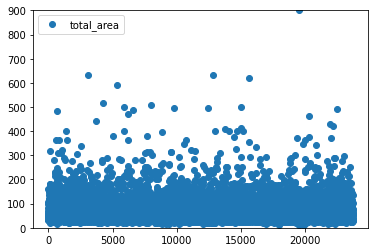

In [62]:
data.plot(y='total_area', style='o', ylim=(0, 900)); #строим диаграмму рассеивания. 

Посмотрим сколько вообще (в числовом выражении) квартир с общей площадью более 300 кв.метров

In [63]:
print(data[data['total_area'] > 300].count()) # выводим кол-во квартир с общей площадью более 300 кв.м.

total_images            61
last_price              61
total_area              61
first_day_exposition    61
rooms                   61
ceiling_height          40
floors_total            61
living_area             48
floor                   61
is_apartment            61
studio                  61
open_plan               61
kitchen_area            48
balcony                 61
locality_name           61
airports_nearest        57
cityCenters_nearest     59
parks_around3000        61
parks_nearest           38
ponds_around3000        61
ponds_nearest           41
days_exposition         48
new_ceiling_height      40
new_last_price          23
dtype: int64


Итак. Мы рассмотрели гистограмму, диаграмму рассеивания, а также посчитали общее количество квартир, c общей площадью более 300 кв.м (менее 1%)\
На основании всего вышеизложенного, примем ответственное решение - ограничить выборку квартиры общей квадратурой в 300 кв.м.\
Для этого создадим новый столбец в нашей таблице (для того чтобы не удалять исходные данные) и перенесем туда только те квартиры, общая площадь которых не превышает 300 кв.метров.

Все эти значения будем считать редкими (менее 1% от общей массы) и удалим их из нового столбца.

Создаем ещё одну функцию.\
Логика следующая:
- Если квадратура квартиры более 300 кв.м. - возвращаем NaN.
- В остальных случаях оставляем всё как есть.

In [64]:
def anomalies_total_area(value): #создаем функцию anomalies_price с перебором по значениям value
    try: 
        if value >300:
            return NaN
        else:
            return value
    except:
        pass

In [65]:
data['new_total_area'] = data['total_area'].apply(anomalies_total_area) #применяем функцию к новому столбцу

In [66]:
data['new_total_area'] = data['new_total_area'].dropna() #удаляем все пропущенные(NaN) значения

In [67]:
print(data['new_total_area'].describe()) #функцией describe() снова вызываем числовое описание диаграммы размаха

count    23638.000000
mean        59.451020
std         30.540964
min         12.000000
25%         40.000000
50%         52.000000
75%         69.400000
max        300.000000
Name: new_total_area, dtype: float64


<div class="alert alert-info"> <b>Комментарии студента: </b>

Честно говоря, проверка на явные дубликаты была выполнена сразу же после изменение названий населённых пунктов (посёлков -> на поселков). После вывода всех уникальных значений.\
    И это проверка не выявила явных дубликатов.\
    Я думал этой проверки будет достаточно.\
Но если необходимо, я, конечно же, ещё раз это сделаю.\
    Нет проблем.\
Чуть ниже напишу код, чтобы удалить явные дубликаты. 
    </div>

In [68]:
data.drop_duplicates().reset_index(drop=True) # удаляем Явные дубликаты (если они есть)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,new_ceiling_height,new_last_price,new_total_area
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,True,...,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,2.70,13000000.0,108.00
1,7,3350000.0,40.40,2018-12-04,1,NaN,11,18.6,1,True,...,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,NaN,3350000.0,40.40
2,10,5196000.0,56.00,2015-08-20,2,NaN,5,34.3,4,True,...,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,NaN,5196000.0,56.00
3,0,64900000.0,159.00,2015-07-24,3,NaN,14,NaN,9,True,...,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,NaN,NaN,159.00
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,True,...,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,3.03,10000000.0,100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,True,...,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,3.70,9700000.0,133.81
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5,38.0,4,True,...,NaN,NaN,0.0,NaN,0.0,NaN,45.0,NaN,3100000.0,59.00
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3,29.7,1,True,...,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,2500000.0,56.70
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17,NaN,12,True,...,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,3.00,11475000.0,76.75


* **Краткий вывод:**

С общей площадью более-менее разобрались.\
Рассмотрели разбросы по данным и приняли ответственное решение уменьшить рассматриваемую выборку менее чем на 1%.\
(т.е. убрали из выборки все квартиры общей площадью более 300 кв.метров\
В следиствии чего изменили среднее значение общей площади квартиры с 60.3 до 59,4 (стандартное отклонение от средних значений уменьшили с 35,5 до 30.5).\
т.е. наибольшее количество продаваемых квартир в Санкт-Петербурге имеют общую площадь диапазоне от ~29 кв.м до 90 кв.м.


#### ОБЩИЙ ВЫВОД ПО ШАГУ №2: 

Итак:\
Мы определили в каких столбцах присутствовали пропуски:\
ceiling_height\
loors_total\
living_area\
is_apartment\
kitchen_area\
locality_name\
airports_nearest\
cityCenters_nearest\
parks_nearest\
ponds_nearest  


И определили, в каких столбцах пропущенные значения мы могли бы заменить на 0:\
balcony\
parks_around3000\
ponds_around3000

Возможные причины пропусков мы подробно описали в пункте 2.1.

Затем мы рассмотрели типы данных в стобцах и пришли к выводу, что большей части столбцов необходимо было изменить тип данных:
Здесь меняем тип данных на числовой:\
last_price\
total_area\
ceiling_height\
floors_total\
living_area\
kitchen_area\
balcony\
airports_nearest\
cityCenters_nearest\
parks_around3000\
parks_nearest\
ponds_around3000\
ponds_nearest\
days_exposition\
\
Здесь меняем тип данных на временной:\
first_day_exposition\
\
Здесь меняем тип данных на булевый/логический:\
is_apartment
\
После обработки типов данных - мы изучили названия населенных пунктов, где продавались квартиры и устранили там явные и неявные дубликаты. 

Ну и последним нашим действием было то, что мы нашли и устранили редкие и выбивающиеся значения, которые немного искажали общие  данные в выборке.\
Старые значения мы оставили в тех же столбцах (т.е. не удаляли их), а для отредактированных и обработанных значений создали отдельные столбцы.

Рассмотрев всевозможные гистограммы, диаграммы рассеивания и прочее, мы решили отредактировать данные только в 3 столбах:\
'ceiling_height' - высота потолков.\
'last_price' - цена квартиры.\
'total_area' - общая площадь квартиры.

В общем итоге каждую из данных выборок мы сократили менее чем на 1%, устранив редкие и выбивающиеся из общей массы данные.

Как итог - мы получили более качественную выборку данных, которую можно будет изучать в дальнейшем.


### Посчитаем и добавим в таблицу новые столбцы

#### Посчитаем цену одного квадратного метра

Для того чтобы определить цену за один квадратный метр нам необходимо будет поделить цену квартиры на общую площадь квартиры.\
Новый столбец назовём ['price_for_1_metr]

In [69]:
data['price_for_1_metr'] = data['last_price'] / data['total_area'] # делим цену на общую площадь

In [70]:
print(data['price_for_1_metr']) #выводим на экран

0        120370.370370
1         82920.792079
2         92785.714286
3        408176.100629
4        100000.000000
             ...      
23694     72490.845228
23695     52542.372881
23696     44091.710758
23697    149511.400651
23698     41795.665635
Name: price_for_1_metr, Length: 23699, dtype: float64


* **Краткий вывод:**

Новый столбец создан и носит название - **'price_for_1_metr'.**

-Не стоит относится к этим значениям слишком серьезно, так как разброс в датах продажи квартир слишком велик.\
т.е. нельзя сравнивать цену квадратных метров между собой, так как каждая квартира была продана в своё время и цена складывалась из многих факторов влияющих на неё.

#### Определим день недели публикации объявления.

Для того, чтобы определить день недели публикации объявления в таком виде, в каком от нас требуется - нам необходимо будет всего-навсего воспользоваться функцией .dt.weekday. к столбцу 'first_day_exposition' \
Функция автоматически будет присваивать цифру 0 - понедельнику, 1 - вторнику и т.д. (данные настройки установлены по умолчанию).
Для начала создадим новый столбец data['weekday'] и применим к нему вышеуказанную функцию.

In [71]:
data['weekday'] = data['first_day_exposition'].dt.weekday 
# создаем новый столбец и присваиваем численные значения дням недели.

Выведем полученный результат на экран.

In [72]:
print(data['weekday']) # выводим на экран значения из нового столбца

0        3
1        1
2        3
3        4
4        1
        ..
23694    1
23695    0
23696    6
23697    1
23698    4
Name: weekday, Length: 23699, dtype: int64


В столбце 'first_day_exposition' пропущенных значений не было, поэтому никаких более действий предпринимать не нужно.

#### Определяем месяц публикации объявления.

Для определения месяца публикации объявления выполним аналогичную операцию.\
Создадим новый столбец 'month' и применим к нему функцию month.

In [73]:
data['month'] = data['first_day_exposition'].dt.month
# создаем новый столбец и присваиваем численные значения месяцу

In [74]:
print(data['month']) # выводим на экран значения месяца

0         3
1        12
2         8
3         7
4         6
         ..
23694     3
23695     1
23696     2
23697     3
23698     7
Name: month, Length: 23699, dtype: int64


#### Определяем год публикации объявления.

Для определения года публикации объявления выполним аналогичную операцию.\
Создадим новый столбец 'year' и применим к нему функцию year.

In [75]:
data['year'] = data['first_day_exposition'].dt.year
# создаем новый столбец и отбираем только значение года

In [76]:
print(data['year']) # выводим на экран значения года

0        2019
1        2018
2        2015
3        2015
4        2018
         ... 
23694    2017
23695    2018
23696    2018
23697    2017
23698    2017
Name: year, Length: 23699, dtype: int64


#### Определяем тип этажа квартиры 

Согласно требуемым Заказчиком условиям, разделяем типы этажа квартиры на три категории:\
-"первый"\
-"последний"\
-"другой"

Для этого нам потребуется написать небольшую функцию, которая будет категоризировать данные.

Логика функции следующая:\
-Если в объявлении в столбце 'floor' этаж равен 1 - в таком случае возвращаем значение - "первый"\
-Если в объявлении значение в столбце 'floor' равно значению 'floor_total' - в таком случае возвращаем - "последний"\
-Во всех остальных случаях - вернем значение "другой".

In [77]:
def floor_category(row): # создаем функцию floor_category с переменным значением row.
    floors_total = row['floors_total']
    floor = row['floor']
    try:
        if floor == 1:
            return 'первый'
        elif floor == floors_total:
            return 'последний'
        else:
            return 'другой'
    except:
        pass

In [78]:
data['type_floor'] = data.apply(floor_category, axis = 1) 
#создаем новый столбец и применяем к нему значения из ранее созданной функции

In [79]:
print(data['type_floor'].head(15)) #выводим на экран получившиеся значения

0        другой
1        первый
2        другой
3        другой
4        другой
5        другой
6        другой
7        другой
8        другой
9        другой
10       другой
11       другой
12    последний
13    последний
14       первый
Name: type_floor, dtype: object


In [80]:
data['type_floor'].value_counts() #считаем общее кол-во квартир расположенных на 1 и последнем этажах.

другой       17446
последний     3336
первый        2917
Name: type_floor, dtype: int64

#### Переводим значение расстояния до центра города из метров в километры.

Для перевода расстояния до центра города из метров в километры - создадим новый столбец - 'new_cityCenters'.\
В этот столбец запишем значения из столбца 'cityCenters_nearest' разделенные на 1000 и округленные функцией round().\
Результат выведем на экран.

In [81]:
data['new_cityCenters']=round((data['cityCenters_nearest'])/1000) 
#создаем новый столбец - переводим метры в километры разделив имеющиеся значения на 1000

In [82]:
print(data['new_cityCenters']) #выводим на экран получившиеся значения

0        16.0
1        19.0
2        14.0
3         7.0
4         8.0
         ... 
23694     4.0
23695     NaN
23696     NaN
23697    10.0
23698     NaN
Name: new_cityCenters, Length: 23699, dtype: float64


####  ОБЩИЙ ВЫВОД ПО ШАГУ №3

Итак, в Шаге №3 мы добавили в нашу таблицу 6 новых столбцов:
1. Цену одного квадратного метра - **['price_for_1_metr']**
2. День недели публикации объявления - **['weekday']**
3. Месяц публикации объявления - **['month']**
4. Год публикации объявления - **['year']**
5. Тип этажа квартиры - **['type_floor']**
6. Расстояние до центра города в киллометрах - **['new_cityCenters']**

### Проведите исследовательский анализ данных

#### Изучение параметров объектов.

##### Общая площадь

Данные по общей площади располагаются в столбце ['total_area']\
Данный стобец мы уже успели просмотреть и подробно расписать в разделе 2.4.\
После изучения данных было принято решение в таблице создать новый столбец ['new_total_area'], в который мы поместили большую часть данных - исключив из них редкие и выбивающиеся значения, которые немного искажали общую выборку.

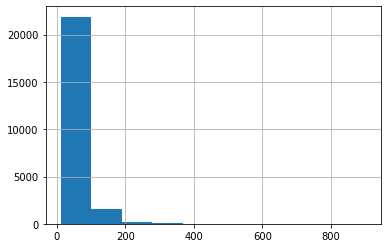

In [83]:
data['total_area'].hist(); # строим гистограмму по общей площади

In [84]:
print(data['total_area'].max()) #выводим максимальное значение площади

900.0


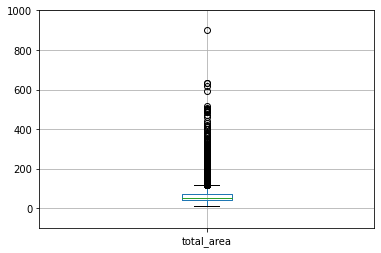

In [85]:
data.boxplot('total_area') #диаграмма размаха для общей площади квартиры
plt.ylim(-100, 1000);
#900 квадратных метров. 


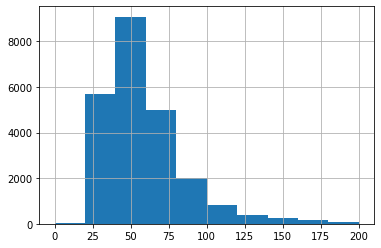

In [86]:
data['new_total_area'].hist(range=(0,200)); # гистограмма по новой выборке - без выбросов и выбивающихся значений

In [87]:
print(data['new_total_area'].describe()) #функцией describe()  вызываем числовое описание диаграммы размаха
data['new_total_area'].median() # выводим медианное значение (после фильтрации)

count    23638.000000
mean        59.451020
std         30.540964
min         12.000000
25%         40.000000
50%         52.000000
75%         69.400000
max        300.000000
Name: new_total_area, dtype: float64


52.0

* **Краткие выводы:** 
1. В данном столбце отсутствуют пропуски. (это хорошее начало, для изучения данных).
2. Нами были обнаружены выбросы и редкие выбивающиеся значения.
К примеру самая большая по размерам квартира имела 900 квадратных метров.
Изучив параметры этой квартиры - мы определили, что данные, в принципе, могут быть верными.
Однако эта и ей подобные квартиры очень сильно искажали общую выборку.
3. Немного поработав со значениями мы приняли решение создать новый столбец в таблице -  ['new_total_area'], в который добавили данные из столбца 'total_area' - исключив выбросы и редкие и выбивающиеся значения, которые в совокупности составляли менее 1% от общей выборки.
4. В следствии чего мы получили среднее значение общей площади квартиры с 59.4 (стандартное отклонение от средних значений - 30.5)
5. Сделали вывод, что наибольшее количество продаваемых квартир в Санкт-Петербурге имеют общую площадь диапазоне от ~29 кв.м до 90 кв.м.
6. Медианное значение общей площади (после фильтрации) равно 52 кв.м.

##### Жилая площадь

Данные по жилой площади располагаются в столбце - ['living_area']

In [88]:
print(data['living_area'].isna().sum()) #выводим на экран кол-во пропущенных значений

1903


Из **23699** значений у нас в таблице отсутствуют **1903** значения в данном столбце - что составляет не малые **8%** от общей выборки.

Изучим гистограмму по данному столбцу.

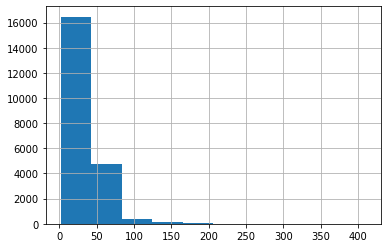

In [89]:
data['living_area'].hist(); #строим гистограмму

In [90]:
print(data['living_area'].max()) # выводим максимальное значение жилой площади

409.7


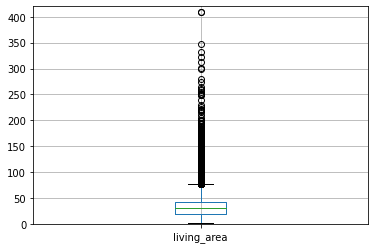

In [91]:
data.boxplot('living_area') #диаграмма размаха для жилой площади квартиры
plt.ylim(0, 420);

In [92]:
print(data['living_area'].describe()) # числовое описание диаграммы размаха

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64


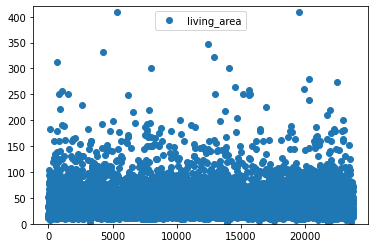

In [93]:
data.plot(y='living_area', style='o', ylim=(0, 420)); # диаграмма рассеивания для жилой площади

In [94]:
print(data['living_area'].median()) # выводим медианное значение жилой площади

30.0


In [95]:
data['living_area'].value_counts() 
#выводим (просто для интереса) сгруппирование кол-во значений жилой площади

18.00    882
17.00    675
30.00    598
16.00    486
20.00    481
        ... 
96.40      1
50.26      1
43.81      1
54.43      1
16.74      1
Name: living_area, Length: 1782, dtype: int64

* **Краткие выводы**:

1. В таблице отсутствует 8% данных по этому столбцу, что составляет очень большую погрешность при исследовании.
2. Как и любом другом столбце здесь имеются редкие и выбивающиеся (большие и маленькие значения).
Наибольшее значение жилой площади составляет 409,7 кв.метров, наименьшее 2 квадратных метра.
3. Среднее значение жилой площади (при наличии выбросов) - 34.4 кв.метра (стандартное отклонение - 22 кв.метра).
4. Как итог - наибольшее количество продаваемых квартир имеют площадь в диапазоне от 12.4 кв.метров до 56.4 кв.метров).
5. При этом медианное значение составляет 30 кв.метров.

##### Площадь кухни

Данные по жилой площади располагаются в столбце - ['kitchen_area']

Из 23699 значений у нас в таблице отсутствуют 2278 значений в данном столбце - что составляет не малые 9.6% от общей выборки.

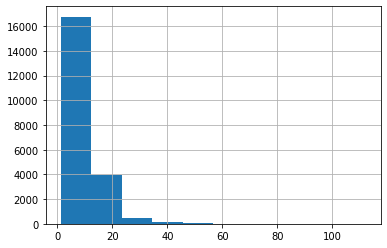

In [96]:
data['kitchen_area'].hist(); #строим гистограмму по площади кухни

In [97]:
print(data['kitchen_area'].max()) # выводим максимальное значение площади кухни

112.0


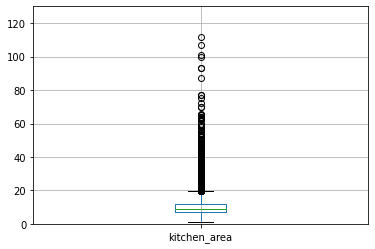

In [98]:
data.boxplot('kitchen_area') #диаграмма размаха 
plt.ylim(0, 130);

In [99]:
print(data['kitchen_area'].describe()) # числовое описание диаграммы размаха

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64


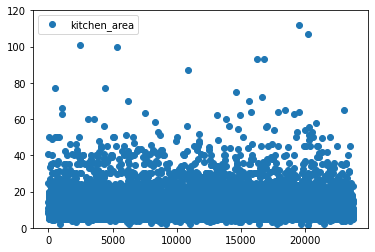

In [100]:
data.plot(y='kitchen_area', style='o', ylim=(0, 120)); # диаграмма рассеивания 

In [101]:
print(data['kitchen_area'].median()) # выводим медианное значение жилой площади

9.1


* **Краткие выводы**:

1. В таблице отсутствует 9.6% данных по этому столбцу, что составляет очень большую погрешность при исследовании.
2. Как и любом другом столбце здесь имеются редкие и выбивающиеся (большие и маленькие значения).
Наибольшее значение площади кухни составляет 112 кв.метров, наименьшее 1.3 квадратных метра.
3. Среднее значение площади кухни (при наличии выбросов) - 10.56 кв.метра (стандартное отклонение - 5.9 кв.метра).
4. Как итог - размеры кухни (у большей части продаваемых квартир) расположены в диапазоне от 4.6 кв.метров до 16.4 кв.метров).
5. При этом медианное значение составляет 9.1 кв.метров.

##### Цена объекта

Данные по цене объекта располагаются в столбце - ['last_price']

Данный стобец мы уже успели просмотреть и подробно расписать в разделе 2.4.
После изучения данных было принято решение в таблице создать новый столбец ['new_last_price'], в который мы поместили большую часть данных - исключив из них редкие и выбивающиеся значения, которые немного искажали общую выборку.

В столбце ['last_price'] отсутвовали пропуски - что само по себе уже являлось хорошим знаком.
Однако в данном столбце было также много редких и выбивающихся значений.
Значения не были аномальными, однако существенно искажали общее представление о средней и медианной цене, в следствие чего было решено немного отфильтровать эти данные.

In [102]:
print(data['last_price'].describe()) #функцией describe() вызываем числовое описание диаграммы размаха

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64


In [103]:
print(data['new_last_price'].describe()) #функцией describe() вызываем числовое описание диаграммы размаха

count    2.350300e+04
mean     5.915821e+06
std      4.614256e+06
min      5.000000e+05
25%      3.400000e+06
50%      4.600000e+06
75%      6.700000e+06
max      4.000000e+07
Name: new_last_price, dtype: float64


In [104]:
print(data['new_last_price'].median()) #выводим медианное значение цены квартиры (значение после фильтрации от выбросов)

4600000.0


In [105]:
data['new_last_price'].value_counts() #просто для инетреса выводим сгруппированное кол-во цен за квартиры

4500000.0     342
3500000.0     291
4300000.0     260
4000000.0     260
4200000.0     259
             ... 
20445000.0      1
7778000.0       1
3973464.0       1
2228000.0       1
4386000.0       1
Name: new_last_price, Length: 2839, dtype: int64

* **Краткие выводы:**

1. Рассмотрели разбросы по данным и приняли ответственное решение уменьшить рассматриваемую выборку примерно на 1%.\
(т.е. убрали из выборки все квартиры стоимостью более 40 млн и менее 500 тысяч)
2. В следиствии чего изменили среднее значение цен за квартиры с 6.5 до 5.9 млн.\
(стандартное отклонение от средних значений уменьшили с 10.1 млн до 4.6 млн).
3. Определили, что наибольшее количество продаваемых квартир в Санкт-Петербурге находится в ценовом диапазоне от ~2 до 10.5 млн. рублей.
4. Медианное значение стоимости квартир (после фильтрации в новом столбце) составило 4.6 млн. рублей.


##### Количество комнат

Данные по количеству комнат располагаются в столбце - ['rooms']

В данном столбце отсутствуют пропуски. (это хорошее начало, для изучения данных).

19
2.0


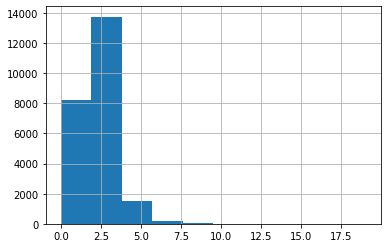

In [106]:
data['rooms'].hist() # строим гистограмму
print(data['rooms'].max()) # находим максимальное значение
print(data['rooms'].median()) # выводим медианное значение 

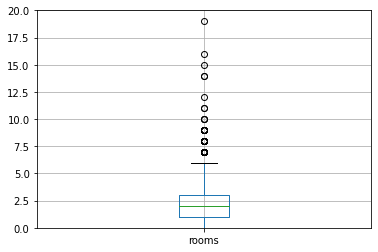

In [107]:
data.boxplot('rooms') #диаграмма размаха 
plt.ylim(0, 20);

In [108]:
print(data['rooms'].describe()) # числовое описание диаграммы размаха

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


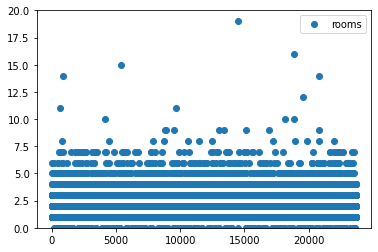

In [109]:
data.plot(y='rooms', style='o', ylim=(0, 20)); # диаграмма рассеивания 

In [110]:
data['rooms'].unique() 
# проверяем все уникальные значения в этом столбце чтобы убедиться, что у нас отсутствуют значения на подобии 2.5 комнат

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

При группировке столбцов по количеству комнат и общей площади - видим медианные показатели площади квартир

In [111]:
print(data.groupby('rooms')['new_total_area'].median().sort_values()) # группируем значения по кол-ву комнат и общей площади

rooms
0      26.025
1      36.530
2      53.000
3      73.000
4      99.000
5     144.500
6     180.000
11    188.900
7     201.500
8     229.500
14    245.400
9     249.950
16    270.000
10    272.600
12        NaN
15        NaN
19        NaN
Name: new_total_area, dtype: float64


In [112]:
print(data.groupby('rooms')['new_last_price'].median().sort_values()) # группируем значения по кол-ву комнат и общей цене

rooms
0      2700000.0
1      3600000.0
2      4770000.0
3      6170000.0
4      8862500.0
5     12900000.0
6     16950000.0
8     19900000.0
7     22000000.0
9     22875000.0
10    23000000.0
11    25250000.0
14    26829500.0
16    28500000.0
19    32250000.0
12           NaN
15           NaN
Name: new_last_price, dtype: float64


In [113]:
data['rooms'].value_counts() # выводим отсортированное и сгруппированное количество комнат

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

* **Краткие выводы:**

1. В данном столбце отсутствуют пропуски. (это хорошее начало, для изучения данных).
2. Определили квартиру с максимальным количеством комнат - 19 комнат.
3. Среднее значение комнат в продаваемых квартирах составило 2.07.\
Стандарное отклоние - 1.07.\
4. Большая часть продаваемых квартир имела от 1 до 3х комнат.
5. Медианное значение комнат в квартирах равно 2.  
6. Из 23669 продаваемых квартир:\
8047 были однокомнатными (~ примерно 33%).\
7940 были двухкомнатными (~ примерно 33%).\
5814 были трехкомнатными (~ примерно 24%).\
т.е. 66% проданных квартир это однушки или двушки.\
80% квартир имели от 1 до 3х комнат.

##### Высота потолков

Данные по высоте потолков расположены в столбце ['ceiling_height']

In [114]:
print(data['ceiling_height'].isna().sum()) # считаем кол-во пропущенных значений в данном столбце

9195


Из 23699 значений у нас в таблице отсутствуют 9195 значения в данном столбце - что составляет целых 38.8% от общей выборки.
Можно сказать, что почти половина данных о высоте потолков отсутствует - это не очень хорошо.

Подробный рассмотр данного столбца был произведен в разделе 2.4.
Здесь мы приведем окончательные тезисы по данному столбцу.

100.0
2.65


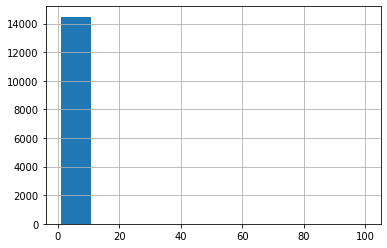

In [115]:
data['ceiling_height'].hist() # строим гистограмму
print(data['ceiling_height'].max()) # находим максимальное значение
print(data['ceiling_height'].median()) # выводим медианное значение 

(0.0, 100.0)

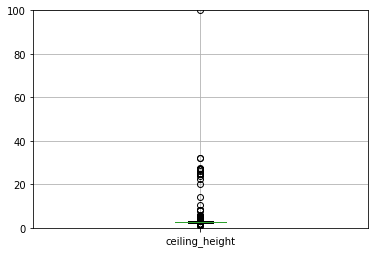

In [116]:
data.boxplot('ceiling_height') #диаграмма размаха 
plt.ylim(0, 100)

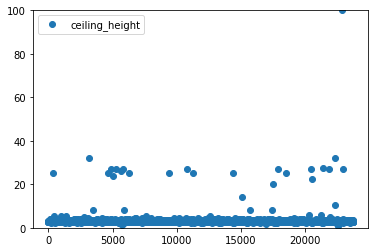

In [117]:
data.plot(y='ceiling_height', style='o', ylim=(0, 100)); # диаграмма рассеивания 

In [118]:
print(data['ceiling_height'].describe()) # числовое описание диаграммы размаха

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


In [119]:
print(data[data['ceiling_height'] == 100]) # выводим на экран строку, в которой у нас квартира с 100 метровым потолком

       total_images  last_price  total_area first_day_exposition  rooms  \
22869             0  15000000.0        25.0           2018-07-25      1   

       ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
22869           100.0             5         14.0      5          True  ...   

       days_exposition  new_ceiling_height  new_last_price  new_total_area  \
22869             19.0                 NaN      15000000.0            25.0   

      price_for_1_metr  weekday  month  year  type_floor  new_cityCenters  
22869         600000.0        2      7  2018   последний              8.0  

[1 rows x 31 columns]


Нами были рассмотрены гистограммы, диаграммы рассеивания и диаграммы размаха.\
Были обнаружены в данных аномальные и ошибочные данные.\
(Например высота потолка в 100 метров - была явной аномалией, которую непонятно было как можно исправить).\
Также были подозрительными значения потолка в 25 и 32 метра.\
Изучив данные подробнее было принято решение создать новый столбец - ['new_ceiling_height'], в который мы поместили отфильтрованные данные по этому столбцу.\
Аномальные значения были удалены, а ошибочные - отредактированы.

6.0
2.65


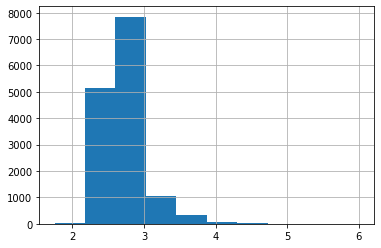

In [120]:
data['new_ceiling_height'].hist() # строим гистограмму
print(data['new_ceiling_height'].max()) # находим максимальное значение
print(data['new_ceiling_height'].median()) # выводим медианное значение 

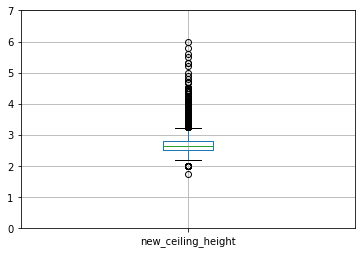

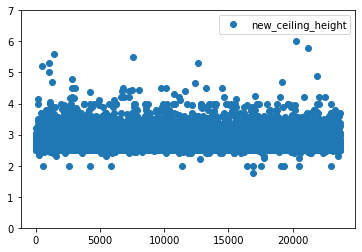

In [121]:
data.boxplot('new_ceiling_height') #диаграмма размаха 
plt.ylim(0, 7)

data.plot(y='new_ceiling_height', style='o', ylim=(0, 7)); # диаграмма рассеивания 

In [122]:
print(data['new_ceiling_height'].describe()) # числовое описание диаграммы размаха

count    14495.000000
mean         2.726556
std          0.278811
min          1.750000
25%          2.510000
50%          2.650000
75%          2.800000
max          6.000000
Name: new_ceiling_height, dtype: float64


In [123]:
data['new_ceiling_height'].value_counts() #просто ради интереса выводим сгруппированные данные по высоте потолков.

2.50    3522
2.60    1647
2.70    1582
3.00    1112
2.80     993
        ... 
3.59       1
4.90       1
3.58       1
2.49       1
4.65       1
Name: new_ceiling_height, Length: 169, dtype: int64

* **Краткие выводы:**

1. Из 23699 значений у нас 9195 пропущенных значений.\
Это означает, как минимум, что погрешность в наших расчетов составляет минимум 38,8%.\
Так что любые утверждения по данному столбцу делаются только с основой вероятности в 61.,2%.\
2. Нами были обнаружены нереальные аномальные значения, которые невозможно было отредактировать с должной точностью 
(например 100 метровый потолок).
Было принято решение такие значения удалить из расчётов, чтобы они не влияли на общую выборку.
3. Нами были обнаружны (скорее всего) ошибочные значение, которые можно было обработать.
(например 25 или 32 метра).
Было принято решение такие значения поделить на 10, чтобы получить адекватные (средние значения).
4. Чтобы не удалить ничего важного - для отфильтрованных данных был создан отдельный столбец - ['new_ceiling_height'].
5. Было принято решение, что в дальнейшем будем пользоваться значениями именно из этого столбца.
6. Среднее значение высоты потолков составило 2.72 метра. (стандартное отклонение составило 0.28 метров).
Т.е. большая часть рассматриваемых нами квартир имела потолок высотой от 2.44 до 3 метров.
7. Медианное значение высоты потолков составило 2.65 метра.
8. Наибольшая доля из проданных квартир имела потолок высотой в 2.50 метра.


##### Этаж квартиры

Данные по этажу квартиры расположены в столбце ['floor']

В столбце ['floors'] отсутвуют пропуски - что само по себе уже является хорошим знаком.

33
4.0


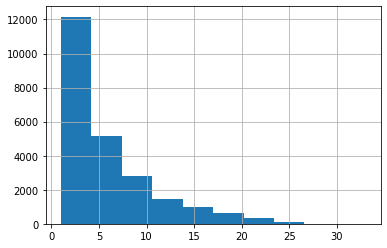

In [124]:
data['floor'].hist() # строим гистограмму
print(data['floor'].max()) # находим максимальное значение
print(data['floor'].median()) # выводим медианное значение 

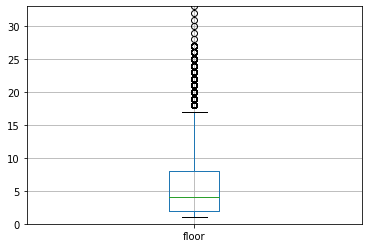

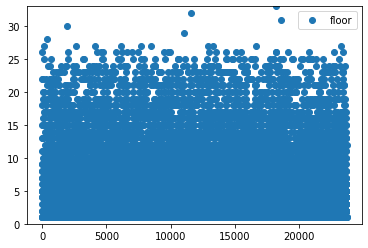

In [125]:
data.boxplot('floor') #диаграмма размаха 
plt.ylim(0, 33)

data.plot(y='floor', style='o', ylim=(0, 33)); # диаграмма рассеивания 

In [126]:
print(data['floor'].describe()) # числовое описание диаграммы размаха

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64


In [127]:
data['floor'].unique()
# проверяем все уникальные значения в этом столбце чтобы убедиться, что у нас отсутствуют значения на подобии 2.5 этажа

array([ 8,  1,  4,  9, 13,  5,  6, 22, 26,  7,  3,  2, 11, 15, 18, 10, 19,
       16, 20, 27, 25, 17, 14, 12, 21, 28, 24, 23, 30, 29, 32, 33, 31])

Чаще всего продавались квартиры расположенные с 1го по 10 этаж.

In [128]:
data['floor'].value_counts() 
# выясняем: из всех проданных квартир, квартиры расположенные на каком этаже продавались чаще всего ?!

2     3368
3     3073
1     2917
4     2804
5     2621
6     1305
7     1218
8     1083
9     1051
10     687
12     526
11     523
13     379
15     343
14     337
16     315
17     227
18     178
19     147
21     125
22     113
20     110
23     100
24      63
25      46
26      24
27      10
28       1
29       1
32       1
30       1
33       1
31       1
Name: floor, dtype: int64

* **Краткие выводы:**

1. В данном столбце отсутствуют пропущенные значение, что является хорошим знаком.
2. При построении, диаграмм размаха и рассеивания - аномальных значений обнаружено не было.
3. Из проданных квартир самая высокая квартира находилась на 33 этаже.
4. Медианное значение этажа составило 5.89 (со стандарным отклонением в 4.88).
то означает, что проданные квартиры чаще всего распологались с 1о по 10ый этаж.
5. Больше всего проданных квартир находилось на 2ом этаже - 3368 - что составляет примерно ~ 14% от общего числа проданных квартир.\
Следом за 2ым этажом наиболее популярными являлись 3, 1, 4 и 5 этаж соответственно.


##### Тип этажа квартиры (''первый', 'последний', 'другой')

Для определения типа этажа квартиры нами был создан новый столбец в датафрейме - ['type_floor']

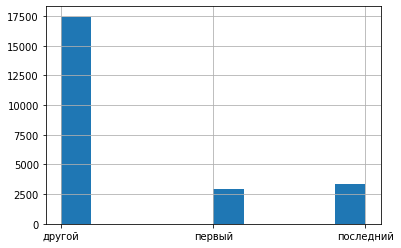

In [129]:
data['type_floor'].hist(); # строим гистограмму

In [130]:
data['type_floor'].value_counts() # смотрим общее количество квартир расположенных на 1ом и последнем этажах

другой       17446
последний     3336
первый        2917
Name: type_floor, dtype: int64

<div class="alert alert-info"> <b>Дополнительные расчёты студента: </b>
    
Дополнительно присвоим полученным значения числовые характеристики.\
Первому этажу присвоим нулевые значения, последнему этажу - цифру 2, всем остальным - 1.\
Результаты сохраним в новом столбце.
    Это нам потребуется, при расчете корреляции значений типа этажа с ценой, т.к. корреляция по Пирсону может сравнивать только числовые значения.
        </div>

In [131]:
# переименуем значения первый, последний другой, другой в числовые значения
#где 0 соответствует первому этажу, 2 - поледнему, 1 остальным.

data['type_floor_digit'] = data.apply( 
    lambda x: 0 if (x.floor == 1) 
    else (2 if (x.floor == x.floors_total) & isinstance(x.floors_total,int) 
    else 1), axis=1
)

* **Краткие выводы:**

1. Пропущенных значений в данном столбце нет.
2. 2917 проданных квартир располагались на 1ом этаже здания.\
(это примерно ~ 12,3% от общего значения проданных квартир)
3. 3336 проданных квартир располагались на последнем этаже здания.\
(это примерно ~14,1% От общего значения проданных квартир)

##### Общее количество этажей в доме.

Данные по общему количеству этажей в доме расположены в столбце ['floors_total ']

В столбце ['floors_total '] - есть отсутствующие значения - их всего 86.\
Это не так много - около 0,36% от общей выборки.\
Причина отсутвия значений - скорее всего не хватка данных у продавцов.\
Однако на всякий случай ознакомимся с данными поближе - выведем только те строки, в которых в данном столбце есть пропущенные значения. В этом нам поможет функция .isnull()

In [132]:
print(data['floors_total'].isna().sum()) # выводим на экран количество пропущенных значений в данном столбце

0


In [133]:
data.loc[data['floors_total'].isnull()] # выводим только те строки, в которых отсутствуют значения в столбце floors_total

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,new_ceiling_height,new_last_price,new_total_area,price_for_1_metr,weekday,month,year,type_floor,new_cityCenters,type_floor_digit


При беглом просмотре - явных закономерностей не замечаем.\
Вероятно эти пропуски не сильно помешают нам в дальнешем исследовании (т.к. их меньше 1%)

Попробуем пока рассмотреть значения этого столбца с другого ракурса.

60
9.0


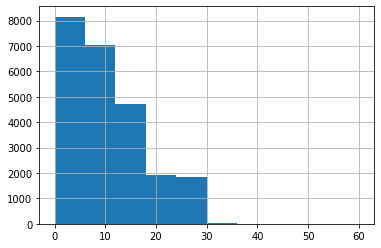

In [134]:
data['floors_total'].hist() # строим гистограмму
print(data['floors_total'].max()) # находим максимальное значение
print(data['floors_total'].median()) # выводим медианное значение 

Самое высокое здание из нашей выборки имеет целых 60 этажей.

In [135]:
data.query('floors_total == 60') # выводим объявление о продаже квартиры, в здании, где у нас 60 этажей

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,new_ceiling_height,new_last_price,new_total_area,price_for_1_metr,weekday,month,year,type_floor,new_cityCenters,type_floor_digit
2253,12,3800000.0,45.5,2018-06-28,2,2.88,60,27.4,4,True,...,2.88,3800000.0,45.5,83516.483516,3,6,2018,другой,49.0,1


Если мы отфильтруем наш столбец максимумом в 33 этажа - тогда получим примерную гистограмму распределение Пуассона

<AxesSubplot:>

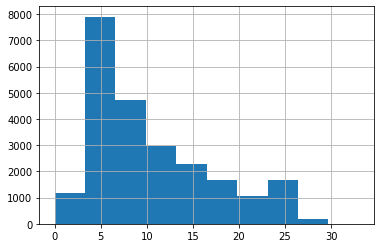

In [136]:
data['floors_total'].hist(range=(0,33)) # строим гистограмму с лимитом в 33 этажа

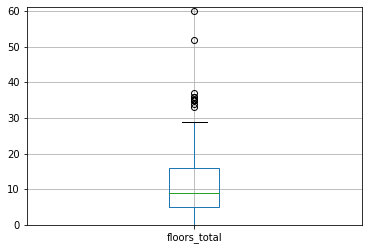

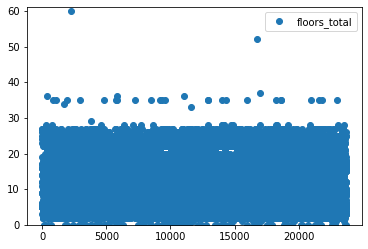

In [137]:
data.boxplot('floors_total') #диаграмма размаха 
plt.ylim(0, 61)

data.plot(y='floors_total', style='o', ylim=(0, 61)); # диаграмма рассеивания 

In [138]:
print(data['floors_total'].describe()) # числовое описание диаграммы размаха

count    23699.000000
mean        10.635090
std          6.616396
min          0.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


In [139]:
data['floors_total'].value_counts() 
# выясняем - какой этажности зданий больше всего имеется.
# Больше всего 5ти этажных зданий. Затем идут 9ти этажные здания.

5     5788
9     3761
16    1376
12    1362
4     1200
10    1174
25    1075
6      914
17     833
3      668
7      592
14     553
18     505
24     469
8      390
2      383
15     365
23     352
19     339
22     286
20     271
13     229
11     203
27     164
21     158
26     124
0       86
1       25
35      24
28      21
36       3
34       1
33       1
60       1
52       1
29       1
37       1
Name: floors_total, dtype: int64

In [140]:
ft = data.query('floors_total <= 28') # создадим переменную 'ft' и посместим туда срез данных с максимумом в 28 этажей

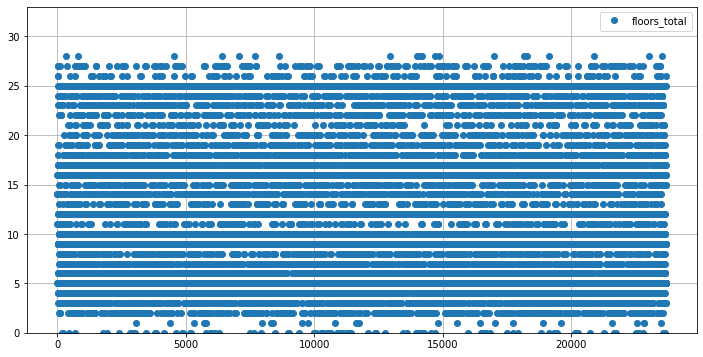

In [141]:
ft.plot(y='floors_total', style='o', ylim=(0, 33), grid=True, figsize=(12, 6));
# выводим картину на экран. Ничего необчного не замечаем.

* **Краткие выводы:**

1. В данном столбце есть пропущенные значения - но их немного (всего 86 - менее 1%).\ 
Определенной закономерности пропусков обнаружено не было.
2. Самое высокое здание, в котором продавалась квартира - имела целых 60 этажей.
3. Наибольшее количество продаваемых квартир находились в 5ти этажных зданиях.\
(5788 квартир - что составляет примерно 24.5% от общей выборки).
4. На втором месте, продавались квартиры в 9ти этажных зданиях.\
(3761 квартир - что составляет примерно 16% от общей выборки).
5. На третьем месте, продавались квартиры в 16ти этажных зданиях.\
(1376 квартир - что составляет примерно 5.8% от общей выборки).
6. Медианное значение этажности зданий равно 9.


##### Расстояние до центра города в метрах.

Расстояние до центра города указано в столбце - ['cityCentres_nearest']

In [142]:
print(data['cityCenters_nearest'].isna().sum()) # считаем количество пропущенных значений

5519


Видим, что в данном столбце отсутствуют 5519 значений - что составляет целых 23.3% от общей выборки.\
т.е. другими словами, у нас отсутвует почти четверть данных в этом столбце - а это очень плохо.

In [143]:
data[data['cityCenters_nearest'].isnull()] 
# выводим только те строки, в которых отсутствуют значения в столбце floors_total

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,new_ceiling_height,new_last_price,new_total_area,price_for_1_metr,weekday,month,year,type_floor,new_cityCenters,type_floor_digit
5,10,2890000.0,30.40,2018-09-10,1,NaN,12,14.40,5,True,...,NaN,2890000.0,30.40,95065.789474,0,9,2018,другой,NaN,1
8,20,2900000.0,33.16,2018-05-23,1,NaN,27,15.43,26,True,...,NaN,2900000.0,33.16,87454.764777,2,5,2018,другой,NaN,1
12,10,3890000.0,54.00,2016-06-30,2,NaN,5,30.00,5,True,...,NaN,3890000.0,54.00,72037.037037,3,6,2016,последний,NaN,2
22,20,5000000.0,58.00,2017-04-24,2,2.75,25,30.00,15,True,...,2.75,5000000.0,58.00,86206.896552,0,4,2017,другой,NaN,1
30,12,2200000.0,32.80,2018-02-19,1,NaN,9,NaN,2,True,...,NaN,2200000.0,32.80,67073.170732,0,2,2018,другой,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.80,2018-09-18,4,2.50,5,45.50,3,True,...,2.50,2100000.0,62.80,33439.490446,1,9,2018,другой,NaN,1
23692,2,1350000.0,30.00,2017-07-07,1,NaN,5,17.50,4,True,...,NaN,1350000.0,30.00,45000.000000,4,7,2017,другой,NaN,1
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5,38.00,4,True,...,NaN,3100000.0,59.00,52542.372881,0,1,2018,другой,NaN,1
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3,29.70,1,True,...,NaN,2500000.0,56.70,44091.710758,6,2,2018,первый,NaN,0


65968.0
181.0
13098.5


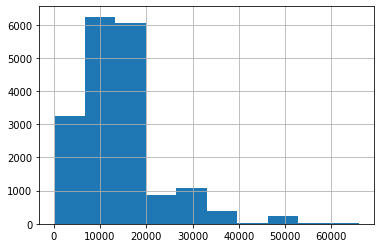

In [144]:
data['cityCenters_nearest'].hist() # строим гистограмму
print(data['cityCenters_nearest'].max()) # находим максимальное значение
print(data['cityCenters_nearest'].min()) # находим максимальное значение
print(data['cityCenters_nearest'].median()) # выводим медианное значение 

In [145]:
data.query('cityCenters_nearest == 65968.0') #самая дальняя квартира расположена в 66 километрах от Санкт-Петербурга

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,new_ceiling_height,new_last_price,new_total_area,price_for_1_metr,weekday,month,year,type_floor,new_cityCenters,type_floor_digit
9640,8,4200000.0,51.4,2014-12-10,2,2.55,5,31.0,2,True,...,2.55,4200000.0,51.4,81712.062257,2,12,2014,другой,66.0,1


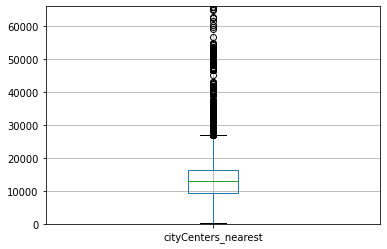

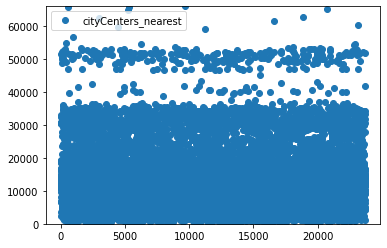

In [146]:
data.boxplot('cityCenters_nearest') #диаграмма размаха 
plt.ylim(0, 66000)

data.plot(y='cityCenters_nearest', style='o', ylim=(0, 66000)); # диаграмма рассеивания 

Основная масса квартир расположена на расстоянии до 35 км от центра города

In [147]:
print(data['cityCenters_nearest'].describe()) # числовое описание диаграммы размаха

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64


Если более не сокращать выборку - получим, что в среднем проданные квартиры располагаются в 14.2 км от центра города со стандартным отклонением в 8.6 км.\
т.е. большая часть квартир расположена на расстоянии 5.6 - 22.6 км от условного центра города.

In [148]:
cCn = data.query('cityCenters_nearest <= 35000') 
# создадим переменную 'cCn' и посместим туда срез данных с максимумом в 35 км от центра города

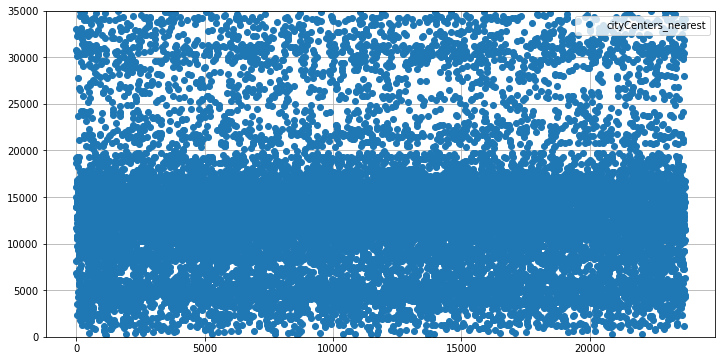

In [149]:
cCn.plot(y='cityCenters_nearest', style='o', ylim=(0, 35000), grid=True, figsize=(12, 6)); 
# выводим картину на экран. Ничего необчного не замечаем.

Ничего необычного в гистограммах и диаграммах замечено не было, поэтому просто категоризируем данные для дальнейшего их рассмотрения.\
Создадим функцию с перебором значений по столбцу ['cityCenters_nearest'] и категоризируем данные так:\
-Квартира расположена на расстоянии до 5 км от центра.\
-Квартира расположена на расстоянии от 15 км до 25 км от центра.\
-Квартира расположена на расстоянии от 25 км до 35 км от центра.\
-Квартира расположена на расстоянии более 35 км от центра.

In [150]:
def category_cityCenters_nearest(row): # создаем функцию category_cityCenters_nearest с переменным значением row.
    cityCenters_nearest = row['cityCenters_nearest']
    try:
        if cityCenters_nearest <= 5000:
            return 'до 5 км от центра'
        elif 5000 < cityCenters_nearest <= 15000:
            return 'от 5 до 15 км от центра'
        elif 15000 < cityCenters_nearest <= 25000:
            return 'от 15 до 25 км от центра'
        elif 25000 < cityCenters_nearest <= 35000:
            return 'от 25 до 35 км от центра'
        elif cityCenters_nearest > 35000: 
            return 'более 35 км от центра'
        else:
            'error'
    except:
        pass

In [151]:
data['cat_cityCenters_nearest'] = data.apply(category_cityCenters_nearest, axis = 1) 
#создаем новый столбец и присваиваем ему значения с помощью ранее созданной функции

In [152]:
data['cat_cityCenters_nearest'].value_counts() #выводим на экран полученные значения

от 5 до 15 км от центра     9775
от 15 до 25 км от центра    4392
до 5 км от центра           2081
от 25 до 35 км от центра    1507
более 35 км от центра        425
Name: cat_cityCenters_nearest, dtype: int64

* **Краткие выводы:**
    
1. В данном столбце у нас **присутствует большое количество пропущенных значений**.\
5519 значений - что составляет целых 23.3% от общей выборки.\
Это означает, что **какие либо предположения можно делать только с большой оговоркой**.\
(погрешностью в 23.3%).
2. Самая дальняя из проданных квартир располагается на расстоянии более 65 км.
3. Среднее растояние от квартиры до центра города составляет 14.2 км при этом стандартное отклонение равно 8.6.\
т.е. большая часть квартир расположена на расстоянии 5.6 - 22.6 км от условного центра города.
4. Эти данные примерно также подтвердились, когда мы осуществили категоризацию данных.\
Мы увидели - что **наибольшая доля квартир расположена на расстоянии от 5 до 15 км от центра города**.\
(~ 54% от общей выборки квартир).
5. Квартир расположенных на расстоянии более 35 км от центра города - не много - 425 - что составляет примерно ~ 2.3% от общей выборки.

##### Расстояние до ближайшего аэропорта

Расстояние до ближайшего аэропорта указано в столбце - ['airports_nearest']

In [153]:
print(data['airports_nearest'].isna().sum()) # считаем количество пропущенных значений

5542


Видим, что в данном столбце отсутствуют 5542 значений - что составляет целых 23.4% от общей выборки.\
т.е. другими словами, у нас **отсутвует** почти **четверть данных** в этом столбце - а это очень плохо.

84869.0
0.0
26726.0


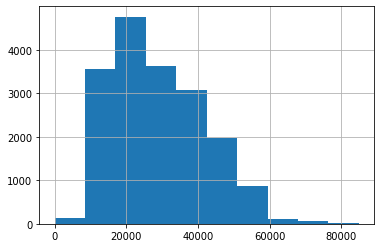

In [154]:
data['airports_nearest'].hist() # строим гистограмму
print(data['airports_nearest'].max()) # находим максимальное значение
print(data['airports_nearest'].min()) # находим максимальное значение
print(data['airports_nearest'].median()) # выводим медианное значение 

В целом гистограмма почти напоминает гистограмму распределение Пуассона, однако видим в ней странные значения типа - квартира расположенная в самом аэропорту - (расстояние равно 0).\
Такие квартиры необходимо убрать из данного столбца. 

In [155]:
data['airports_nearest']=data['airports_nearest'].replace(0,data['airports_nearest'].median()) 
#меняем нулевое значение на медианное

In [156]:
airp_n = data.query('500 <= airports_nearest') # Создаем переменную, в которую помещаем срез данных

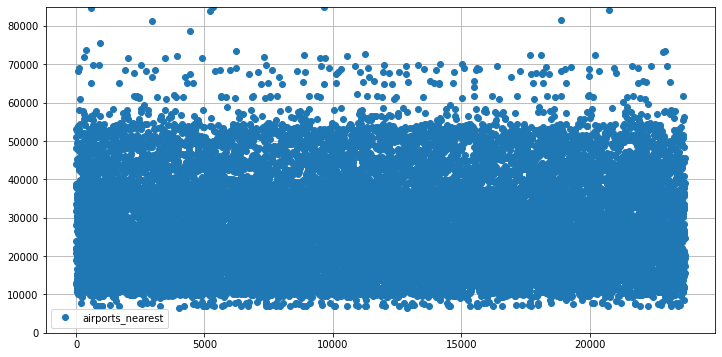

In [157]:
airp_n.plot(y='airports_nearest', style='o', ylim=(0, 85000), grid=True, figsize=(12, 6)); 
# выводим картину на экран. Ничего необчного не замечаем.

In [158]:
print(data['airports_nearest'].describe()) # числовое описание диаграммы размаха

count    18157.000000
mean     28795.144132
std      12629.082097
min       6450.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64


In [159]:
def category_airports_nearest(row): # создаем функцию category_airports_nearest с переменным значением row.
    airports_nearest = row['airports_nearest']
    try:
        if airports_nearest <=2000:
            return 'аномалия'
        elif 2000 < airports_nearest <= 14000:
            return 'до 14 км до аэропорта'
        elif 14000 < airports_nearest <= 26000:
            return 'от 14 до 26 км до аэропорта'
        elif 26000 < airports_nearest <= 38000:
            return 'от 26 до 38 км до аэропорта'
        elif 38000 < airports_nearest <= 50000:
            return 'от 38 до 50 км до аэропорта'
        elif airports_nearest > 50000: 
            return 'более 50 км до аэропорта'
        else:
            'error'
    except:
        pass

In [160]:
data['cat_airports_nearest'] = data.apply(category_airports_nearest, axis = 1) 
#создаем новый столбец и присваиваем ему значения с помощью ранее созданной функции

In [161]:
data['cat_airports_nearest'].value_counts() # выводим на экран полученные значения

от 14 до 26 км до аэропорта    6567
от 26 до 38 км до аэропорта    5199
от 38 до 50 км до аэропорта    3006
до 14 км до аэропорта          2167
более 50 км до аэропорта       1218
Name: cat_airports_nearest, dtype: int64

Наибольшая доля продаваемых квартир расположена на расстоянии от 14 до 38 км от аэропорта - (~ 64,8% от общей выборки - 11 766 квартир)

* **Краткие выводы:**

1. В столбце со значением расстояния до ближайшего аэропорта очень много пропусков данных (5542, что составляет 23.4% от общей выборки).\
т.е. другими словами, у нас отсутвует почти четверть данных в этом столбце - а это значит что любые предположения мы можем делать только с большой оговоркой.(с погрешностью в 23.4%).
2. В данном столбце у нас также появлялось аномальное значение равное нулю.\
т.е. квартира (якобы) располагалась в самом аэропорту.\
Было принято решение заменить данное нулевое значение - медианным.
3. В остальном ничего необычного замечено не было.
4. Медианное значение расстояния до аэропорта составило 26 726 м. Стандартное отклонение составило 12 629 м.\
т.е. большая часть продаваемых квартир располагалась на расстоянии от 14 до 38 км до аэропорта. (~64,8% от общей выборки)

##### Расстояние до ближайшего парка.

Данные о расстоянии до ближайшего парка расположены в столбце - ['parks_nearest']

In [162]:
print(data['parks_nearest'].isna().sum()) # считаем количество пропущенных значений

15620


Видим что в данном столбце колоссальное количество пропущенных данных.\
15 620 - почти 66% от общего количества.
Делать какие-либо предположения в данном случае крайне нежелательно и опасно, т.к. из-за нехватки данных мы можем сделать ошибочные (и даже прямо противоположные) выводы.

3190.0
1.0
455.0


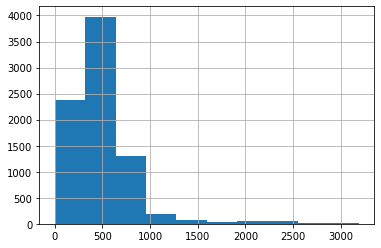

In [163]:
data['parks_nearest'].hist() # строим гистограмму
print(data['parks_nearest'].max()) # находим максимальное значение
print(data['parks_nearest'].min()) # находим максимальное значение
print(data['parks_nearest'].median()) # выводим медианное значение 

Видим, что гистограмма, в том виде, в котором она есть, не очень похожа на нормальное распределение Пуассона.
Много околонулевых значений, которые сдвигают средние значения общей выборки влево.

In [164]:
data['parks_nearest'] = data['parks_nearest'].replace(0, data['parks_nearest'].median()) # меняем нулевые значения на медианные

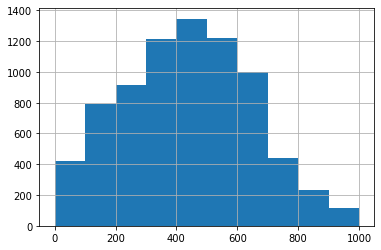

In [165]:
data['parks_nearest'].hist(range=(0, 1000)); # строим гистограмму

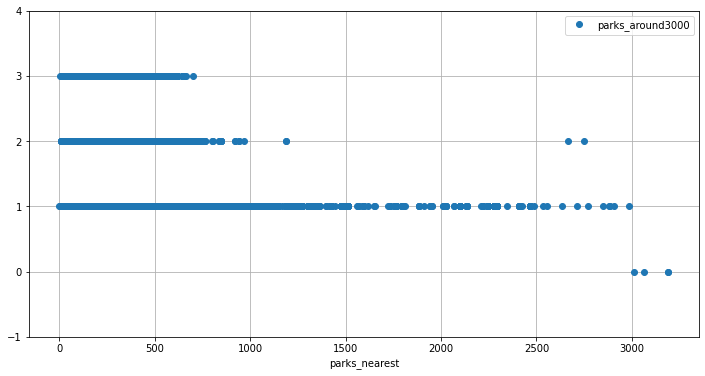

In [166]:
data.plot(x='parks_nearest', y='parks_around3000', style='o', ylim=(-1, 4), grid=True, figsize=(12, 6)); 
#строим график зависимости расстояния парков к их количеству.

In [167]:
p_n = data.query('10 <= parks_nearest <= 3500') #создаем переменную, помещаем туда срез данных

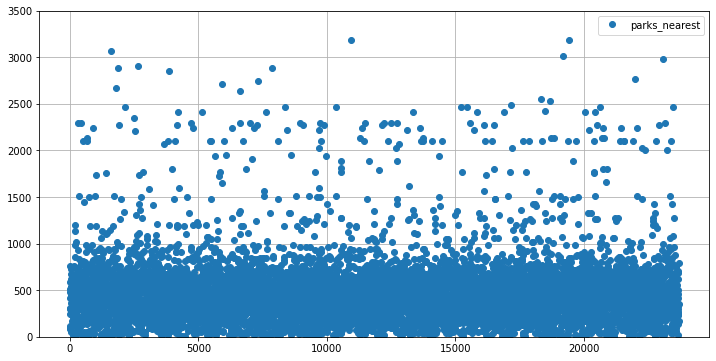

In [168]:
p_n.plot(y='parks_nearest', style='o', ylim=(0, 3500), grid=True, figsize=(12, 6)); 
# выводим картину на экран. Ничего необчного не замечаем.

In [169]:
print(data['parks_nearest'].describe()) # числовое описание диаграммы размаха

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64


In [170]:
data[data['parks_nearest']<=5].count() # выводим на экран кол-во парков, расположенных на расстоянии менее 5 метров от квартиры

total_images               3
last_price                 3
total_area                 3
first_day_exposition       3
rooms                      3
ceiling_height             2
floors_total               3
living_area                3
floor                      3
is_apartment               3
studio                     3
open_plan                  3
kitchen_area               2
balcony                    3
locality_name              3
airports_nearest           3
cityCenters_nearest        3
parks_around3000           3
parks_nearest              3
ponds_around3000           3
ponds_nearest              2
days_exposition            3
new_ceiling_height         2
new_last_price             3
new_total_area             3
price_for_1_metr           3
weekday                    3
month                      3
year                       3
type_floor                 3
new_cityCenters            3
type_floor_digit           3
cat_cityCenters_nearest    3
cat_airports_nearest       3
dtype: int64

In [171]:
def category_parks_nearest(row): # создаем функцию category_parks_nearest с переменным значением row.
    parks_nearest = row['parks_nearest']
    try:
        if parks_nearest <=5:
            return 'аномалия'
        elif 5 < parks_nearest <= 100:
            return 'до 100 м до парка'
        elif 100 < parks_nearest <= 250:
            return 'от 100 до 250 м до парка'
        elif 250 < parks_nearest <= 450:
            return 'от 250 до 450 м до парка'
        elif 450 < parks_nearest <= 650:
            return 'от 450 до 650 м до парка'
        elif 650 < parks_nearest <= 900:
            return 'от 650 до 900 м до парка'
        elif parks_nearest > 900: 
            return 'более 900 м до парка'
        else:
            'error'
    except:
        pass

In [172]:
data['cat_parks_nearest'] = data.apply(category_parks_nearest, axis = 1) 
#создаем новый столбец, присваиваем ему значения из функции

In [173]:
data['cat_parks_nearest'].value_counts() #выводим на экран получившиеся значения

от 450 до 650 м до парка    2500
от 250 до 450 м до парка    2326
от 100 до 250 м до парка    1250
от 650 до 900 м до парка    1083
более 900 м до парка         494
до 100 м до парка            423
аномалия                       3
Name: cat_parks_nearest, dtype: int64

* **Краткие выводы:**

1. В данном столбце отсутствует огромное количество данных.
15 620 - почти 66% от общего количества.\ 
Первое что приходит на ум - это пойти с вопросом к тому, кто выгружал данные и уточнить, из-за чего могла возникнуть данная ситуация?!?
2. Если отсутствие данных связано с проблемами выгрузки - в таком случае, нужны будут новые данные. 
Если же повторная выгрузка данных выдаст то же количество пропущенных значений - значит мы сможем делать предположения: 
в следствии чего могли бы возникнуть данные пропуски.\
(к примеру могло бы оказаться так, что парков поблизости не было, из-за этого эту колонку при заполнении оставляли пустой сами продавцы квартир).
3. Присутствуют аномальные значения, к примеру с расстоянием до парка менее 5 метров. (таких значения всего 2).
4. Мы можем (с большой оговоркой) сказать, что медианное расстояние от квартиры до парка равно 455 метра со стандартным отклонением в 342 метра.
т.е. большая часть продаваемых квартир (из имеющихся данных) была расположена на расстоянии от 113 до 792 метров до ближайшего парка.\
(После категоризации данных в новом столбце 'cat_parks_nearest' можно увидеть, что самое большое количество квартир находится на расстоянии от 250 до 650 метров от ближайшего парка.

##### День и месяц публикации объявления

Данные о дне публикации объявления расположены в столбце ['weekday'].\
Данные о месяце публикации объявления расположены в столбце ['month']

Пропусков в данных столбцах нет.\
Построим гистограммы по этим столбцам и посмотрим на их значения в отсортированном, сгруппированном виде.

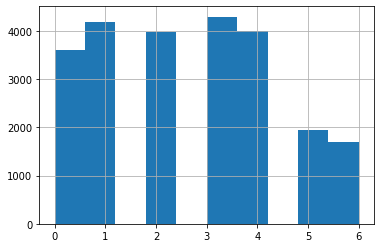

In [174]:
data['weekday'].hist(); # строим гистограмму

In [175]:
data['weekday'].value_counts() # выводим сгруппированные, отсортированные значения

3    4295
1    4183
4    4000
2    3974
0    3612
5    1936
6    1699
Name: weekday, dtype: int64

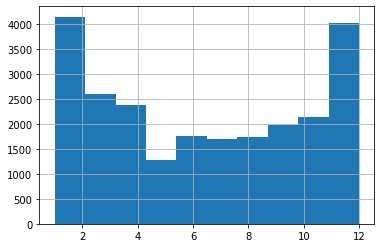

In [176]:
data['month'].hist(); # строим гистограмму

In [177]:
data['month'].value_counts() # выводим сгруппированные, отсортированные значения

2     2640
3     2587
4     2379
11    2371
10    2127
9     1981
6     1760
8     1744
7     1695
12    1641
1     1500
5     1274
Name: month, dtype: int64

* **Краткие выводы:**

Мы рассмотрели данные, в какой день день и месяц опубликовывались объявления о продаже квартир.\
Из полученных данных можем сделать следующие выводы:\
1. Чаще всего объявления опубликовывались в **будние дни**. (~ 84.7% от общего количества)\
Следовательно, реже всего опубликовывались объявления в **выходные**. (~15.3% от общего количества)\
Вероятно, это потому, что большое количество публикаций приходится на агенства по продаже недвижимости, а они, в свою очередь, работают именно в будние дни.
2. **День недели практически не играл роли в количестве публикуемых объявлений**, но если это важно, то в **четверг** объявления публиковались **немного чаще** чем в другие дни.
3. **Чаще всего** объявления о продаже квартиры публиковались в **Феврале, Марте, Апреле, Октябре и Ноябре**. (т.е. в конце зимы-начале весны) и (в конце осени).\
51% публикаций приходилось именно на эти 5 месяцев.\
Больше всего публикаций конкретно в этой выборке - пришлось на Февраль.
4. **Реже всего** публикации квартир приходились на **Декабрь, Январь и Май**.
5. Отсюда можно вывести некую закономерность. Звучать она будет примерно так:\
В самый холодный период зимы (Декабрь-Январь) никто не желает продавать квартиры, следовательно публикаций о продаже квартир мало.\
Однако когда начинает понемногу теплеть и приближается весна - засчёт отложенного спроса на квартиры - на рынок выходит много покупателей - а следовательно и много продавцов недвижимости.\
3 месяца начинают активно публиковать объявляения о продаже, и как только рынок пресыщается - спрос на квартиры снова падает (в Мае) и, как следствие, уменьшается и количество продаваемых квартир (публикаций о продаже).
 

#### Изучаем как быстро продавались квартиры.

Данные о количестве дней, за которые была продана квартира указаны в столбце ['days_exposition']

In [178]:
print(data['days_exposition'].isna().sum()) # считаем количество пропущенных значений

3181


Видим в данном столбце 3181 пропущенное значение.\
Это почти ~13.4% от общей выборки, а это не очень хороший знак.

In [179]:
data.loc[data['days_exposition'].isnull()] # выводим только те строки, в которых отсутствуют значения в столбце days_exposition

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,price_for_1_metr,weekday,month,year,type_floor,new_cityCenters,type_floor_digit,cat_cityCenters_nearest,cat_airports_nearest,cat_parks_nearest
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,True,...,120370.370370,3,3,2019,другой,16.0,1,от 15 до 25 км от центра,от 14 до 26 км до аэропорта,от 450 до 650 м до парка
7,5,7915000.0,71.60,2019-04-18,2,NaN,24,NaN,22,True,...,110544.692737,3,4,2019,другой,12.0,1,от 5 до 15 км от центра,от 14 до 26 км до аэропорта,None
44,13,5350000.0,40.00,2018-11-18,1,NaN,22,NaN,3,True,...,133750.000000,6,11,2018,другой,12.0,1,от 5 до 15 км от центра,от 26 до 38 км до аэропорта,от 450 до 650 м до парка
45,17,5200000.0,50.60,2018-12-02,2,2.65,9,30.3,7,True,...,102766.798419,6,12,2018,другой,13.0,1,от 5 до 15 км от центра,от 26 до 38 км до аэропорта,None
46,17,6600000.0,52.10,2019-01-31,2,2.60,24,29.7,9,True,...,126679.462572,3,1,2019,другой,13.0,1,от 5 до 15 км от центра,от 14 до 26 км до аэропорта,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21400000.0,145.00,2018-11-02,4,3.00,26,71.4,17,True,...,147586.206897,4,11,2018,другой,11.0,1,от 5 до 15 км от центра,до 14 км до аэропорта,None
23685,15,2490000.0,31.00,2019-01-24,1,2.50,5,17.3,5,True,...,80322.580645,3,1,2019,последний,52.0,2,более 35 км от центра,от 38 до 50 км до аэропорта,None
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,True,...,72490.845228,1,3,2017,другой,4.0,1,до 5 км от центра,от 14 до 26 км до аэропорта,от 650 до 900 м до парка
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3,29.7,1,True,...,44091.710758,6,2,2018,первый,NaN,0,None,None,None


Явной закономерности по датам, месяцу или году при беглом осмотре не обнаружено.\
Т.е. пропуски есть и в 2017, 2018, 2019 годах и в будни и в выходные и летом и зимой.\
Если бы мы были уверены, что данные квартиры не продались - мы могли бы заполнить пропущенные значения в столбце [days_exposition] высчитав значения из столбца [first_day_exposition] и последнего дня продажи квартиры.
Однако, раз эти квартиры были проданы - мы не можем так поступить.\
Придётся просто не учитывать эти данные в общем рассмотрении.

1580.0
1.0
95.0


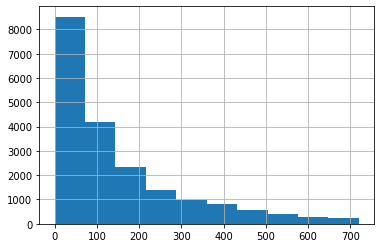

In [180]:
data['days_exposition'].hist(range=(0, 720)) # строим гистограмму
print(data['days_exposition'].max()) # находим максимальное значение
print(data['days_exposition'].min()) # находим максимальное значение
print(data['days_exposition'].median()) # выводим медианное значение 

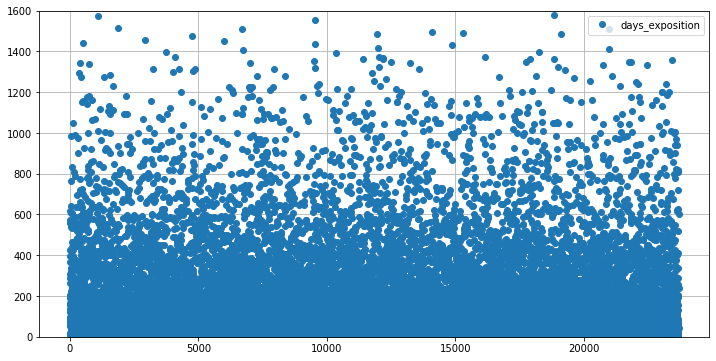

In [181]:
data.plot(y='days_exposition', style='o', ylim=(0, 1600), grid=True, figsize=(12, 6)); #строим диаграмму кол-ва дней объявления

In [182]:
print(data['days_exposition'].describe()) # числовое описание диаграммы размаха

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


In [183]:
def category_days_exposition(row): # создаем функцию category_days_exposition с переменным значением row.
    days_exposition = row['days_exposition']
    try:
        if days_exposition <=5:
            return 'очень быстрая продажа'
        elif 5 < days_exposition <= 30:
            return 'продажа в течение месяца'
        elif 30 < days_exposition <= 90:
            return 'продажа от 1 месяца до 3х месяцев'
        elif 90 < days_exposition <= 180:
            return 'продажа от 3 месяцев до полугода'
        elif 180 < days_exposition <= 360:
            return 'продажа от полугода до года'
        elif 360 < days_exposition <= 720:
            return 'продажа от года до 2х лет'
        elif days_exposition > 720: 
            return 'продажа более 2х лет'
        else:
            'error'
    except:
        pass

In [184]:
data['cat_days_exposition'] = data.apply(category_days_exposition, axis = 1) #создаем новый столбец, категоризируем данные

In [185]:
data['cat_days_exposition'].value_counts() #выводим на экран полученные значения

продажа от 1 месяца до 3х месяцев    5990
продажа от 3 месяцев до полугода     4288
продажа от полугода до года          3375
продажа в течение месяца             3248
продажа от года до 2х лет            2341
продажа более 2х лет                  786
очень быстрая продажа                 490
Name: cat_days_exposition, dtype: int64

* **Краткие выводы:**

1. В данном столбце присутствуют 3181 пропущенное значение. (Это почти ~13.4% от общей выборки).\
А значит любые предположения мы можем делать только с большой долей осмотрительности.(с погрешностью).\
Явной закономерности у пропусков - обнаружено не было. 
2. Изучив данные мы получили следующие данные:\
    -Самая быстрая продажа - 1 день.\
    -Самая долгая продажа - 1580 дней (более 4х лет).\
    -**Среднее значение** продажи квартиры равно **180 дней**.\
    -**Медианное** значение времени продажи квартиры равно **95 дней** (чуть больше 3х месяцев).
3. Создав в таблице новый столбец - ['cat_days_exposition'] мы категоризовали данные для более тщательного их рассмотрения.\
    Рассмотрев данные - можно сделать некоторые предположения:\
    -**В течении месяца** продается около 18.2% квартир.\
    -**Чаще всего** квартиры продавались в течении **1-3 месяцев** - (~ 29.2% продаж приходилось на этот период).\
    -**На втором** месте по длительности располагались квартиры, которые продавались от **3х месяцев до полугода** - (~ 20.9% продаж).\
    т.е. обобщая вышесказанное - можно сказать, что **большая часть квартир продается примерно в первые полгода размещения объявления** (**68.3%**).
4. Сверхбыстрыми продажами мы решили считать продажи, которые были осуществены менее чем за 5 дней.\
    Таких продаж было немного 490 (примерно 2% от всех продаж).
4. Сверхдолгими продажами посчитали те, которые были осуществелены более чем за 2 года.\
    Таких продаж было 786 (примерно 3.8% от всех продаж).

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта.

##### Выясняем зависит ли цена от общей площади.

Для беглого изучения данных мы можем воспользоваться функцией .plot() к двум столбцам.\
По оси 'x' отметим значения общей площади квартиры.\
По оси 'y' отметим цену продажи квартиры.

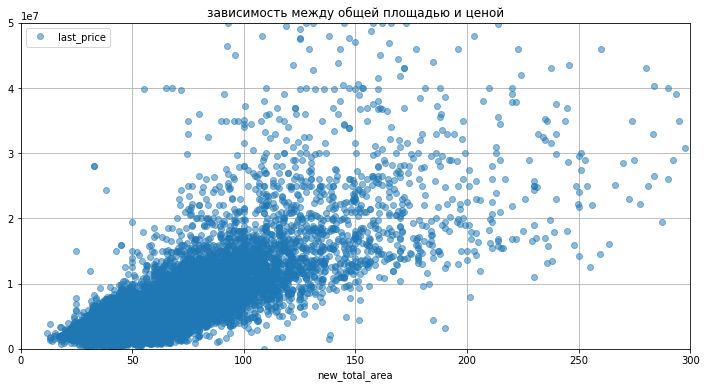

In [186]:
data.plot(x='new_total_area', y='last_price', style='o', xlim=(0, 300), ylim=(0, 50000000), grid=True, figsize=(12, 6),
alpha=0.5, title = 'зависимость между общей площадью и ценой'); #строим график зависимости цены от общей площади 

На построенном графике взаимосвязь цены от общей площади прослеживается.\
Видно, что при увеличении площади квартиры увеличивается и её цена, но это логично итак-итак, однако, пока сложно сказать насколько эта взимосвязь сильная.

* **Краткий вывод:**
1. При построении графика - видим, что взаимосвязь между площадью квартиры и ценой прослеживается.
2. Данная зависимость носит положительный характер, т.е. чем больше площадь - тем больше цена.
3. Численное значение зависимости (корреляции) рассмотрим в самом конце сразу для всех значений.

##### Выясняем зависит ли цена от жилой площади.

Посмотрим, что покажет нам график (функция .plot() нам поможет).\
По оси 'x' отметим значения жилой площади квартиры.\
По оси 'y' отметим цену продажи квартиры.

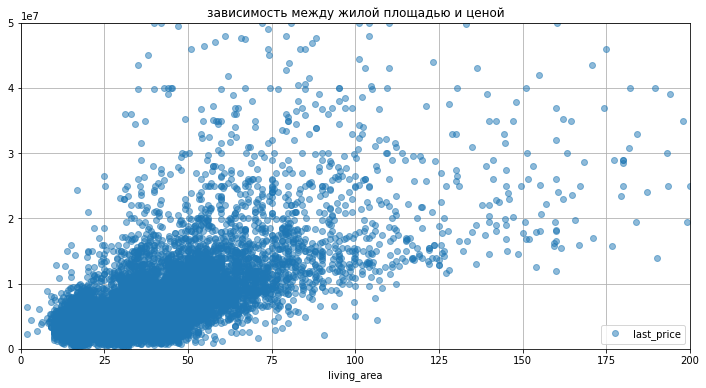

In [187]:
data.plot(x='living_area', y='last_price', style='o', xlim=(0, 200), ylim=(0, 50000000), grid=True, figsize=(12, 6),
alpha=0.5, title = 'зависимость между жилой площадью и ценой'); #строим график зависимости цены от жилой площади 

График похож на предыдущий.\
Взаимосвязь цены от жилой площади прослеживается.\
Видно, что при увеличении жилой площади квартиры увеличивается цена.

* **Краткий вывод:**
1. При построении графика - видим, что взаимосвязь между жилой площадью квартиры и ценой прослеживается.
2. Данная зависимость носит положительный характер, т.е. чем больше жилая площадь - тем больше цена.
3. Численное значение зависимости (корреляции) рассмотрим в самом конце сразу для всех значений

##### Выясняем зависит ли цена от площади кухни.

Посмотрим, что покажет нам график (функция .plot() нам поможет).\
По оси 'x' отметим значения площади кухни.\
По оси 'y' отметим цену продажи квартиры.

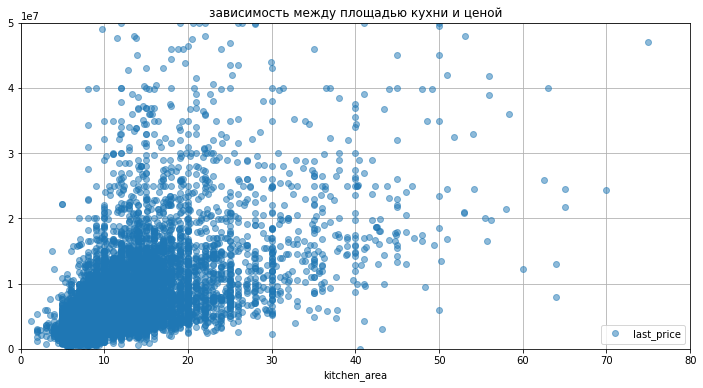

In [188]:
data.plot(x='kitchen_area', y='last_price', style='o', xlim=(0, 80), ylim=(0, 50000000), grid=True, figsize=(12, 6),
alpha=0.5, title = 'зависимость между площадью кухни и ценой'); #строим график зависимости цены от площади кухни 

Взаимосвязь цены от площади кухни прослеживается.
Видно, что при увеличении площади кухни увеличивается цена.

* **Краткий вывод:**
1. При построении графика - видим, что взаимосвязь между площадью кухни и ценой прослеживается.
2. Данная зависимость носит положительный характер, т.е. чем больше площадь кухни - тем больше цена.
3. Численное значение зависимости (корреляции) рассмотрим в самом конце сразу для всех значений

##### Выясняем зависит ли цена от количества комнат в квартире.

Посмотрим, что покажет нам график (функция .plot() нам поможет).\
По оси 'x' отметим значения количества комнат.\
По оси 'y' отметим цену продажи квартиры.

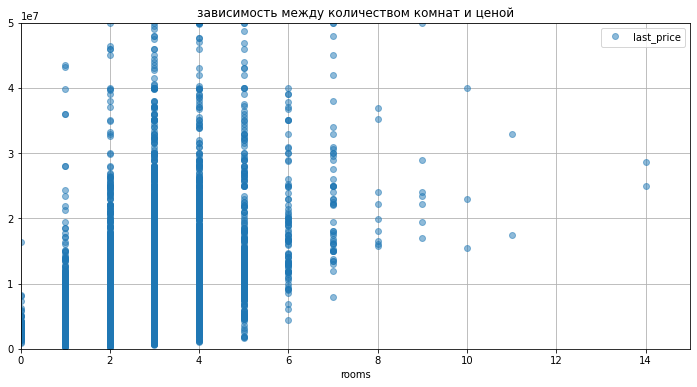

In [189]:
data.plot(x='rooms', y='last_price', style='o', xlim=(0, 15), ylim=(0, 50000000), grid=True, figsize=(12, 6),
alpha=0.5, title = 'зависимость между количеством комнат и ценой'); #строим график зависимости цены от количества комнат

Взаимосвязь цены от количества комнат прослеживается. Видно, что при увеличении количества комнат в целом увеличивается и цена.

* **Краткий вывод:**
1. При построении графика - видим, что взаимосвязь между количеством комнат и ценой прослеживается.
2. Данная зависимость носит положительный характер, т.е. чем больше комнат - тем больше цена.
3. Численное значение зависимости (корреляции) рассмотрим в самом конце сразу для всех значений.

##### Выясняем зависит ли цена от этажа, на котором расположена квартира.

Смотрим, что покажет нам график.
По оси 'x' отметим значения этажа.
По оси 'y' отметим цену продажи квартиры.

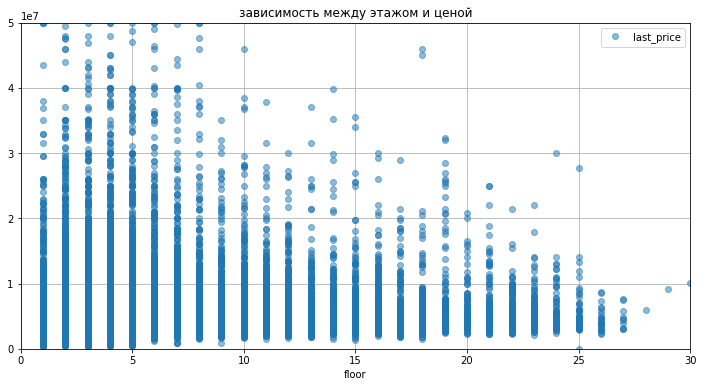

In [190]:
data.plot(x='floor', y='last_price', style='o', xlim=(0, 30), ylim=(0,50000000), grid=True, figsize=(12, 6),
alpha=0.5, title = 'зависимость между этажом и ценой'); 
#строим график зависимости цены от этажа, на котором расположена квартира

Сложно ответить есть ли зависимость между ценой и этажом.\
Если она есть, то скорее всего она слабая и связана скорее всего с тем, что на последних этажах обычно продают более элитную недвижимость, и, как следствие, более дорогую недвижимость, нежели на 1ых этажах.

* **Краткий вывод:**
1. При построении графика - не понятно, есть ли зависимость между этажом и ценой.
    Скорее всего зависимость есть, но она небольшая.
2. Данная зависимость носит скорее всего положительный характер, т.е. чем выше квартира - тем больше цена.
    Но данная корреляция связана скорее всего с тем, что на последних этажах, обычно, продают более элитную, и соответственно, более дорогую недвижимость.
3. Численное значение зависимости (корреляции) рассмотрим в самом конце сразу для всех значений.

##### Выясняем зависит ли цена от даты размещения объявления.

Смотрим, что покажут нам графики. По оси 'x' будем отмечать день, месяц, год. По оси 'y' отметим цену продажи квартиры.\
Для наглядности возьмем медианные значения цены.

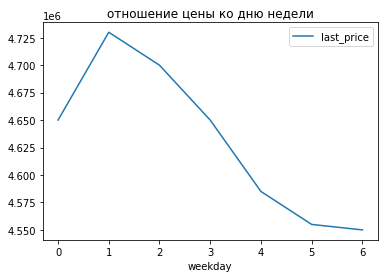

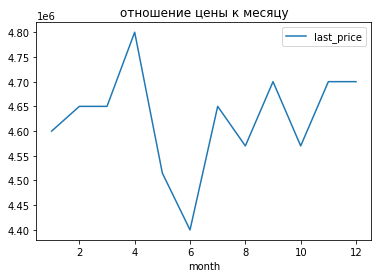

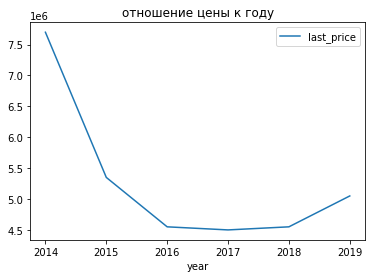

In [192]:
# выводим графики зависимости дня/месяца/года от цены. используем медианные значения.

data.pivot_table(index='weekday',values='last_price',aggfunc='median')\
.plot(y='last_price', kind='line', title='отношение цены ко дню недели');

data.pivot_table(index='month',values='last_price',aggfunc='median')\
.plot(y='last_price', kind='line', title='отношение цены к месяцу');

data.pivot_table(index='year',values='last_price',aggfunc='median')\
.plot(y='last_price', kind='line', title='отношение цены к году');

* **Краткие выводы:**

Зависимость цены от дня еле заметная. но графики показывают, что она есть.\
Ближе ко вторникам цена становится чуть-чуть выше, чем в остальные дни.\
Зависимость цены от месяца - не заметна.\
Сложно сказать есть она или нет.\
Зависимость цены от года - прослеживается, однако не будем торопиться с выводами.\
Ближе к 2014 году медианные цены на квартиры были около 7.5 миллионов, а к 2017 опустились до 4.5 миллионов.\
т.е. в данном случае мы наблюдаем обратную зависимость:\
Со временем цены на недвижимость упали. (по крайней мере на рассматриваемом участке с 2014 по 2017 год).\
С 2017 года цены вновь начинают понемногу расти.


Проведя дополнительное обследование, мы выявили некую закономерность, что зависимость общей площади продаваемых квартир также со временем падала (от года к году).\
т.е., размышляя логически, можно придти к выводу, что цена на квартиры падала только потому, что уменьшалась общая площадь продаваемых квартир.\
В этот период продавалось большее количество квартир с меньшей площадью, поэтому и общая цена на них была немного меньше.\
В целом, стоимость квартир с одной и той же площадью могла не изменяться годами и со временем наоборот даже расти.


Рассмотрим динамику цены и площади продаваемых квартир. И потом пересмотрим выводы, т.к., возможно, упала не столько цена, сколько площадь продаваемых квартир?


Необходимо построить график зависимости даты от общей площади.\
Данные по общей площади возьмем из нового столбца, где располагаются отфильтрованные данные. 

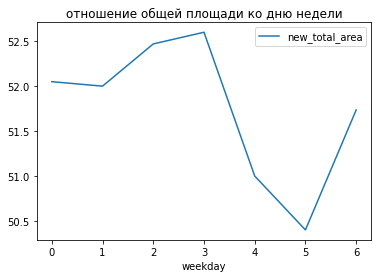

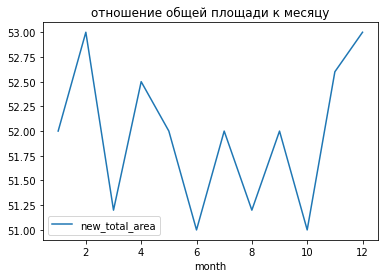

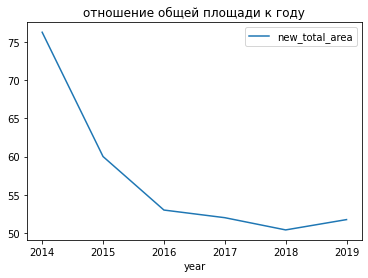

In [193]:
# выводим графики зависимости общей площади от цены. используем медианные значения.

data.pivot_table(index='weekday',values='new_total_area',aggfunc='median').\
plot(y='new_total_area', kind='line', title='отношение общей площади ко дню недели');

data.pivot_table(index='month',values='new_total_area',aggfunc='median').\
plot(y='new_total_area', kind='line', title='отношение общей площади к месяцу');

data.pivot_table(index='year',values='new_total_area',aggfunc='median').\
plot(y='new_total_area', kind='line', title='отношение общей площади к году');

Можно увидеть, что графики зависимости времени от общей площади и от цены почти идентичны.
    
    1. На первом графике мы видим некую разницу по дням недели - но она не существенна (всего 2 кв.метра).
Не думаю, что её можно или даже нужно брать в расчёт. Но если это важно, то по графикам - можно сказать, что по четвергам продаются квартиры с большей медианной площадью, чем по субботам (разница всего в 2 кв.метра).\
    Это не серьезно.
    
    2. По месяцам - сложно сказать что-то определенное.
Разница всё такая же условная и минимальная.\
    Но если это имеет значение - можно сказать, что в Марте, Июле, Августе и Октябре обычно продаются квартиры с меньшей общей площадью, чем в другие месяцы. (Однако разница не существенная - менее 2кв.м).\
Также мы должны учесть, что в этом столбце собраны месяцы по разным годам, что ещё больше ограничивает нас в возможности сделать определенные выводы.\
    Определенной тенденции к увеличению или уменьшению общей площади по месяцам - нет.
    
    3. Со временем уменьшается общая площадь продаваемых квартир.
На протяжении с 2014 года по 2018 годы видим, что со временем уменьшается общая площадь продаваемых квартир.\
Можно сделать следующее предположение:\
С 2014 года цены на жильё падали в основном из-за того, что уменьшались общие площади продаваемых квартир.\
    
т.е., размышляя логически, можно придти к выводу, что цена на квартиры падала только потому, что уменьшалась общая площадь продаваемых квартир.
В этот период продавалось большее количество квартир с меньшей площадью, поэтому и общая цена была немного меньше.

(другими словами люди покупали более скромные квартиры (с меньшей площадью), поэтому средние цены на рынке стали меньше.)\

##### ОБЩИЙ ВЫВОД ПО ПУНКТУ 4.3

Мы просмотрели графики зависимостей цены от различных факторов.\
Осталось только рассмотреть эту корреляцию в числовых значениях и убедиться в том, что мы сделали верные выводы по каждому критерию.

Для того, чтобы увидеть зависимость между ценой и оставшимися характеристиками напишем небольшую функцию, с перебором значений (value) по каждому столбцу.\
Все столбцы вынесем в отдельный список - (list).\
Для определения зависимости воспользуемся функцией .corr()

In [194]:
list= ['total_area', 'living_area', 'kitchen_area', 'rooms', 'floor', 'weekday', 'month', 'year'] #создаем новый список

for value in list: # создаем функцию с перебором значений
    correlation = data['last_price'].corr(data[value]) #вычисляем корреляцию
    print(f'Корреляция между last_price и {value} составляет: {correlation:0.2%}')

Корреляция между last_price и total_area составляет: 65.37%
Корреляция между last_price и living_area составляет: 56.65%
Корреляция между last_price и kitchen_area составляет: 51.99%
Корреляция между last_price и rooms составляет: 36.33%
Корреляция между last_price и floor составляет: 2.66%
Корреляция между last_price и weekday составляет: 0.16%
Корреляция между last_price и month составляет: 0.28%
Корреляция между last_price и year составляет: -4.31%


In [195]:
 list= ['total_area', 'living_area', 'kitchen_area', 'rooms', 'type_floor_digit', 'weekday', 'month', 'year'] #создаем новый список

for value in list: # создаем функцию с перебором значений
    correlation = data['last_price'].corr(data[value]) #вычисляем корреляцию
    if 0.75 <= correlation <= 1.0:
        print(f'Корреляция между last_price и {value} составляет: {correlation:0.2}; коррелияция очень высокаяя положительная')
    elif 0.50 <= correlation <= 0.74:
        print(f'Корреляция между last_price и {value} составляет: {correlation:0.2}; коррелияция высокаяя положительная')
    elif 0.25 <= correlation <= 0.49:
        print(f'Корреляция между last_price и {value} составляет: {correlation:0.2}; коррелияция средняя положительная')
    elif 0.00 <= correlation <= 0.24:
        print(f'Корреляция между last_price и {value} составляет: {correlation:0.2}; коррелияция слабая положительная')
    elif -0.24 <= correlation <= 0.00:
        print(f'Корреляция между last_price и {value} составляет: {correlation:0.2}; коррелияция слабая отрицательная')
    elif -0.49 <= correlation <= -0.24:
        print(f'Корреляция между last_price и {value} составляет: {correlation:0.2}; коррелияция средняя отрицательная')
    elif -0.74 <= correlation <= -0.50:
        print(f'Корреляция между last_price и {value} составляет: {correlation:0.2}; коррелияция высокая отрицательная')
    elif -0.1 <= correlation <= -0.75:
        print(f'Корреляция между last_price и {value} составляет: {correlation:0.2}; коррелияция очень высокая отрицательная')


Корреляция между last_price и total_area составляет: 0.65; коррелияция высокаяя положительная
Корреляция между last_price и living_area составляет: 0.57; коррелияция высокаяя положительная
Корреляция между last_price и kitchen_area составляет: 0.52; коррелияция высокаяя положительная
Корреляция между last_price и rooms составляет: 0.36; коррелияция средняя положительная
Корреляция между last_price и type_floor_digit составляет: 0.059; коррелияция слабая положительная
Корреляция между last_price и weekday составляет: 0.0016; коррелияция слабая положительная
Корреляция между last_price и month составляет: 0.0028; коррелияция слабая положительная
Корреляция между last_price и year составляет: -0.043; коррелияция слабая отрицательная


<div class="alert alert-info"> <b>Комментарии студента: </b>
    
**Значение r – Пирсона характеризует уровень связи между переменными: (Данные скопированы с презентации)**\
• 0,75 – 1.00 очень высокая положительная\
• 0,50 – 0.74 высокая положительная\
• 0,25 – 0.49 средняя положительная\
• 0,00 – 0.24 слабая положительная\
• 0,00 – -0.24 слабая отрицательная\
• -0,25 – -0.49 средняя отрицательная\
• -0,50 – -0.74 высокая отрицательная\
• -0,75 – -1.00 очень высокая отрицательная
        </div>

<div class="alert alert-info"> <b>Комментарии студента: </b>
    
Согласно данным из таблицы делаем выводы:\
    1. Наибольшая зависимость (корреляция) между ценой и площадью: (общей, жилой, кухни).\
    Там у нас высокая положительная корреляция.\
    Высокая зависимость. Чем больше площадь - тем больше цена. (Чем меньше площадь, тем меньше цена)\
    2. Зависимость между ценой и количеством комнат - средняя положительная.\
    3. Во всех остальных случаях зависимость (корреляция) слабая.\
    4. Корреляция между ценой и годом всё также отрицательная, но как мы выяснили, это связано с тем, что со временем также уменьшались и площади продаваемых квартир.\
    А если площади уменьшаются (то в соответствии с первым выводом, также падают и цены на квартиры).
        </div>

In [196]:
list= ['year'] # а что нам скажет корреляция по Пирсону дат к общей площади.

for value in list: # создаем функцию с перебором значений
    correlation = data['new_total_area'].corr(data[value]) #вычисляем корреляцию
    print(f'Корреляция между new_total_area и {value} составляет: {correlation:0.2}')

Корреляция между new_total_area и year составляет: -0.09


В подтверждение нашей гипотезы, корреляция по Пирсону говорит, что зависимость между общей площадью и годом продажи тоже есть:\
    Она слабая, отрицательная\
т.е. зависимость есть, но по Пирсону - она считается слабой.


Последнее, что мы рассмотрим - это есть ли зависимость между медианной ценой квартиры и годом её продажи.
Оставим только срез с 2017 года.\
Как мы можем заметить - зависимость есть - и она прямо пропорциональная.\
Т.е. со временем цены на квартиры увеличиваются!!!!


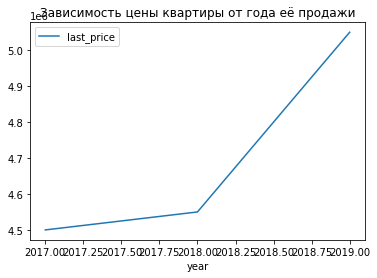

In [197]:
 # оставляем только срез данных после 2016 года
data.query('year>2016').pivot_table(index='year',values='last_price',aggfunc='median')\
.plot(y='last_price', kind='line', title = 'Зависимость цены квартиры от года её продажи');

* **Общий вывод:**

Все наши догадки подтвердились.
Зависимость между ценой и некоторыми характеристиками прослеживается.


Зависимость следующуя:\
-**Чем больше** общая площадь, жилая площадь, площадь кухни, количество комнат - **тем выше** цена квартиры.\
-Зависимость между ценой и этажом тоже есть, но она, как мне кажется, образовалась только засчет того, что в рассматриваемой выборке также была элитная недвижимость, которая как правило расположена на последних этажах зданий.(у элитной недвижимости цена выше - отсюда и зависимость между последними этажами и ценой).\
-Зависимость между ценой и днем недели или месяцем - практически отсутствует.\
-Зависимость между ценой и годом - на первый взгляд кажется прямо противоположная, т.е. со временем цены на квартиры падали\
Однако это неверное предположение!!!!!\
Изучив данные внимательные мы заметили что со временем (с годами) цена на квартиры тоже увеличивается.\
А падение средних цен напрямую связано с уменьшением общей площади в продаваемых квартирах.
А как мы знаем, при уменьшении общей площади - средние цены также уменьшаются.

Так что можно сделать однозначный вывод:\
Цены на квартиры растут с годами.\
Зависимость положительная, прямо пропорциональная.\
**с 2017 года цены на квартиры увеличиваются!!!!! (Можно наглядно увидеть это на графике выше)**

#### Считаем среднюю цену одного квадратного метра в 10 населенных пунктах с наибольшим числом объявлений.

Для определения цены одного квадратного метра в 10 населенных пунктах с наибольшим числом объявлений нам потребуется использовать сводные таблицы.\
Для начала создим таблицу с названиями, ценой и общей площадью.

In [198]:
top_10 = data.pivot_table(index='locality_name', values = ['last_price', 'total_area'], aggfunc=['sum', 'count']) 
#создали новую переменную top_10. Индексами будут названия населенных пунктов - значениями цена и общая площадь

In [199]:
print(top_10.head(10)) #проверяем что получилось. (не обязательно)

                            sum                 count           
                     last_price total_area last_price total_area
locality_name                                                   
бокситогорск       1.353900e+07     769.20         16         16
волосово           7.120000e+07    1806.65         36         36
волхов             1.931299e+08    5511.80        111        111
всеволожск         1.508049e+09   22296.83        398        398
выборг             7.704830e+08   13307.56        237        237
высоцк             7.240000e+06     208.90          4          4
гатчина            1.070919e+09   15639.48        307        307
деревня агалатово  1.427000e+07     196.70          4          4
деревня аро        9.720000e+06     190.30          3          3
деревня батово     1.397000e+07     470.40          9          9


Переименуем названия столбцов.

In [200]:
top_10.columns = ['last_price_sum', 'total_area_sum', 'last_price_count', 'total_area_count'] # переименовываем столбцы

In [201]:
top_10.pop('total_area_count') # удаляем лишний столбец с количеством общей площади

locality_name
бокситогорск     16
волосово         36
волхов          111
всеволожск      398
выборг          237
               ... 
сосновый бор     87
сясьстрой        24
тихвин           49
тосно           104
шлиссельбург     57
Name: total_area_count, Length: 322, dtype: int64

In [202]:
print(top_10.head(10)) #проверяем что получилось. (не обязательно)

                   last_price_sum  total_area_sum  last_price_count
locality_name                                                      
бокситогорск         1.353900e+07          769.20                16
волосово             7.120000e+07         1806.65                36
волхов               1.931299e+08         5511.80               111
всеволожск           1.508049e+09        22296.83               398
выборг               7.704830e+08        13307.56               237
высоцк               7.240000e+06          208.90                 4
гатчина              1.070919e+09        15639.48               307
деревня агалатово    1.427000e+07          196.70                 4
деревня аро          9.720000e+06          190.30                 3
деревня батово       1.397000e+07          470.40                 9


In [203]:
top_10.sort_values(by=['last_price_count'],ascending=False, inplace=True) #сортируем получившиеся данные

In [204]:
top_10 = top_10.iloc[:15] # из всех полученных значений оставляем только те, в которых количество объявлений больше 15

In [205]:
top_10['price_for_1_metr'] = top_10['last_price_sum']/top_10['total_area_sum'] 
# создаем в нашей таблице новый столбец (стоимость квадратного метра)
# делим сумму на общую площадь

In [206]:
top_10.sort_values(by=['price_for_1_metr'],ascending=True, inplace=True) # сортируем данные

<AxesSubplot:title={'center':'цена 1кв.м. в разных насёленных пунктах'}, ylabel='locality_name'>

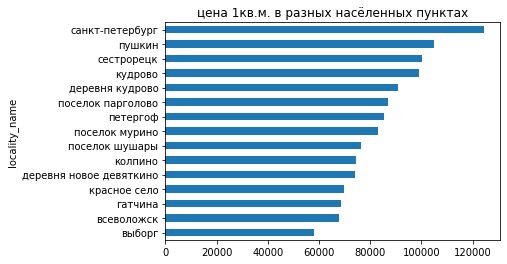

In [207]:
top_10['price_for_1_metr'].plot(kind='barh', title ='цена 1кв.м. в разных насёленных пунктах') # строим столбчатую диаграмму

In [208]:
top_10.value_counts() # выводим полученные значения (не обязательно)

last_price_sum  total_area_sum  last_price_count  price_for_1_metr
5.580237e+08    7528.99         144               74116.680059        1
6.803960e+08    9768.60         178               69651.331818        1
7.704830e+08    13307.56        237               57898.142109        1
7.912875e+08    7973.68         173               99237.433657        1
8.891920e+08    10397.15        201               85522.667269        1
1.070919e+09    15639.48        307               68475.381534        1
1.160535e+09    11596.16        183               100079.262445       1
1.266013e+09    13924.95        299               90916.895213        1
1.339839e+09    17992.24        338               74467.617484        1
1.467600e+09    16847.50        327               87110.874551        1
1.508049e+09    22296.83        398               67635.128626        1
1.807556e+09    23681.36        440               76328.217594        1
2.030713e+09    24442.54        556               83081.092636       

* **Краткие выводы:**

1. Мы построили столбчатую диаграмму со значениями стоимости 1 кв.м. в 10 населенных пунктах с наибольшим числом объявлений.
(более 15 объявлений).
2. **Самая высокая цена 1 кв.м.** оказалась, как ни странно у **"Санкт-Петербурга"**. (124 514,62 руб.)
3. На втором месте оказался город - "Пушкин" (105 097,36 руб.)
4. **Самая низкая цена 1 кв.м.** оказалась у города **"Выборг"** (57 898,14 руб.)

In [209]:
data.groupby('locality_name').agg({'balcony':'count', 'last_price':'median'}) \
    .sort_values(by = 'balcony', ascending = False) \
    .head(10)

,balcony,last_price
locality_name,,
санкт-петербург,15721,5500000.0
поселок мурино,556,3400000.0
поселок шушары,440,3950000.0
всеволожск,398,3450000.0
пушкин,369,5180000.0
колпино,338,3600000.0
поселок парголово,327,4100000.0
гатчина,307,3100000.0
деревня кудрово,299,3790000.0


<div class="alert alert-info"> <b>Комментарии студента: </b>
    
Да, мы что-то такое проходили, но я уже и забыл.\
    Здорово!\
    Большое спасибо !!! :)\
    Сейчас выясним у какого насёленного пункта самая большая медианная площадь проданных квартир. :D
        </div>

In [210]:
data.groupby('locality_name').agg({'new_total_area':'median', 'rooms': 'median', 'last_price':'median'}) \
    .sort_values(by = 'new_total_area', ascending = False) \
    .head(10)

,new_total_area,rooms,last_price
locality_name,,,
деревня хязельки,230.00,5.0,11000000.0
поселок александровская,118.50,3.0,8725000.0
деревня бор,115.15,3.5,10397600.0
поселок репино,108.00,3.0,8083708.0
деревня каськово,100.00,3.0,3700000.0
деревня нижняя,98.00,4.0,4000000.0
деревня глинка,91.50,2.5,4750000.0
деревня пижма,79.50,3.0,1800000.0
поселок углово,74.30,3.0,3380000.0


#### Рассматриваем как стоимость объектов зависит от расстояния до центра города.

Для определения того  как стоимость объектов зависит от расстояния до центра города нам потребуется использовать сводную таблицу.

Данные по расстоянию до центра города возьмём из ранее созданного столбца ['new_cityCenters'].
По условию, в расчёт берём только квартиры из Санкт-Петербурга, следовательно locality_name == 'санкт-петербург'.

Построим столбчатую диаграмму с этими значениями.

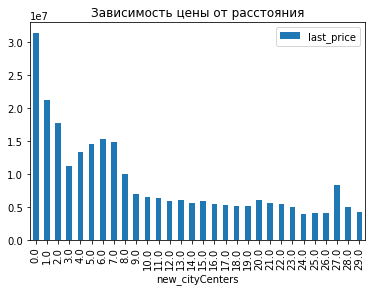

In [211]:
(
    data[data['locality_name']=='санкт-петербург'] #из всего столбца выбираем только объекты в спб
    .pivot_table(
        index='new_cityCenters', #столбец, где расстояние указано в км
        values='last_price', #столбец с ценой
        aggfunc='mean') # средние значения
    .plot(kind='bar', title = 'Зависимость цены от расстояния')
);

* **Краткие выводы:**

1. Как мы и ожидали чисто интуитивно - диаграмма нам показала, что наибольшая стоимость объектов относится к центру города.\
    **Чем ближе к центру - тем более дорогие квартиры**.
2. Самые дорогие квартиры - это те, которые находятся на расстоянии до 2х км. от центра города.
3. С увеличением расстояния от центра города - цена на квартиры уменьшается.

### ОБЩИЙ ВЫВОД

В нашем распоряжении были данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.

Наша задача заключалась в том, чтобы выполнить предобработку данных, изучить их и найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

О каждой квартире в базе содержалось два типа данных: добавленные пользователем и картографические. \
К первому типу относились площадь квартиры, её этаж и количество балконов.\
Ко второму — расстояния до центра города, аэропорта и ближайшего парка. 


Произведя осмотр и ознакомление с данными мы можем сделать некоторые выводы и объявить о некоторых замеченных закономерностях.

* **О предобработке данных (Шаг 2):**

Данные, полученные нами по данной ссылке('/datasets/real_estate_data.csv'), к сожалению, оказались "сырыми".\
Для того чтобы их изучить, нам потребовалось произвести их предобработку. 

Мы обнаружили:
1. Большое количество пропущенных значений.\
(особенно это было заметно в столбцах, где должны были быть указаны расстояние до ближайшего парка и пруда.
2. Редкие и аномальные значения.

Нам пришлось:
1. Менять типы данных во многих столбцах.
2. Заменять, там где это было возможно, пропущенные значения - нулевыми.
3. Строить гистограммы и диаграммы размаха, чтобы выявить редкие и аномальные значения.
4. Устранять эти самые редкие и выбивающиеся значения.

* **О добавлении новых столбцов (Шаг 3):**

Произведя предобработку данных, мы принялись к следующему пункту.\
В шаге 3 нам потребовалось добавить в таблицу новые столбцы:

1. Цену одного квадратного метра - **['price_for_1_metr']**
2. День недели публикации объявления - **['weekday']**
3. Месяц публикации объявления - **['month']**
4. Год публикации объявления - **['year']**
5. Тип этажа квартиры - **['type_floor']**
6. Расстояние до центра города в киллометрах - **['new_cityCenters']**

* **Проведение исследовательского анализа данных (Шаг 4):**

В Шаге 4 нам пришлось проводить исследовательский анализ.

Вот что нам удалось выявить:

1. **Общая площадь.**

Нами были обнаружены выбросы и редкие выбивающиеся значения. К примеру самая большая по размерам квартира имела 900 квадратных метров. Избавившись от выбросов и аномально больших значений мы получили следующий результат:\
Среднее значение общей площади квартиры составило 59.4 (стандартное отклонение от средних значений - 30.5).\
Сделали вывод, что наибольшее количество продаваемых квартир в Санкт-Петербурге имеют общую площадь диапазоне от ~29 кв.м до 90 кв.м.\
**Медианное значение общей площади квартиры составило 52.кв.метра.**

2. **Жилая площадь.**

В таблице отсутствовало 8% данных по этому столбцу, что составило очень большую погрешность при исследовании.\
Как и любом другом столбце там имелись редкие и выбивающиеся значения.\
Наибольшее значение жилой площади составило 409,7 кв.метров, наименьшее 2 квадратных метра.\
Среднее значение жилой площади (при наличии выбросов) - 34.4 кв.метра (стандартное отклонение - 22 кв.метра).\
Как итог - наибольшее количество продаваемых квартир имеют жилую площадь в диапазоне от 12.4 кв.метров до 56.4 кв.метров).\
**Медианное значение жилой площади составило 30 кв.метров.**

3. **Площадь кухни.**

В таблице отсутствовало 9.6% данных по этому столбцу, что составило очень большую погрешность при исследовании.\
Как и любом другом столбце здесь имелись редкие и выбивающиеся значения.\
Наибольшее значение площади кухни составило 112 кв.метров, наименьшее 1.3 квадратных метра.\
Среднее значение площади кухни площади (при наличии выбросов) - 10.56 кв.метра (стандартное отклонение - 5.9 кв.метра).\
Как итог - размеры кухни (у большей части продаваемых квартир) расположены в диапазоне от 4.6 кв.метров до 16.4 кв.метров).\
**Медианное значение площади кухни составило 9.1 кв.метров.**

4. **Цена объекта.**

Рассмотрели разбросы по данным и приняли ответственное решение уменьшить рассматриваемую выборку примерно на 1%.\
(т.е. убрали из выборки все квартиры стоимостью более 40 млн и менее 500 тысяч).\
В следствие чего изменили среднее значение цен за квартиры с 6.5 до 5.9 млн.\
(стандартное отклонение от средних значений уменьшили с 10.1 млн до 4.6 млн).\
Определили, что наибольшее количество продаваемых квартир находится в ценовом диапазоне от ~2 до 10.5 млн. рублей.\
**Медианная цена квартиры (после фильтрации) составила 4.6 млн. рублей.**

5. **Количество комнат.**

Определили квартиру с максимальным количеством комнат - 19 комнат.\
Среднее значение комнат в продаваемых квартирах составило 2.07.\
Стандарное отклоние - 1.07.\
**Большая часть продаваемых квартир имела от 1 до 3х комнат.**\
Медианное значение комнат в квартирах равно 2.\
Из 23669 продаваемых квартир:\
8047 были однокомнатными (~ примерно 33%).\
7940 были двухкомнатными (~ примерно 33%).\
5814 были трехкомнатными (~ примерно 24%).\
т.е. 66% проданных квартир это однушки или двушки.\
80% квартир имели от 1 до 3х комнат.

6. **Высота потолков.**

Из 23699 значений у нас 9195 пропущенных значений.\
Это означало, что, как минимум, погрешность в наших расчетах составляет минимум 38,8%.\
Так что любые утверждения по данному столбцу делались только с вероятностью в 61,2%.\
Нами были обнаружены нереальные аномальные значения, которые нам пришлось также редактировать.\
После чего мы получили следующее:\
Среднее значение высоты потолков составило 2.72 метра. (стандартное отклонение составило 0.28 метров).\
Т.е. большая часть рассматриваемых нами квартир имела потолок высотой от 2.44 до 3 метров.\
Медианное значение высоты потолков составило 2.65 метра.\
**Наибольшая доля из проданных квартир имела потолок высотой в 2.50 метра.**

7. **Этаж квартиры.**

При построении, диаграмм размаха и рассеивания - аномальных значений обнаружено не было.\
Из проданных квартир самая высокая квартира находилась на 33 этаже.\
Медианное значение этажа составило 5.89 (со стандарным отклонением в 4.88).\
Это означало, что проданные квартиры чаще всего распологались с 1го по 10ый этаж.\
**Больше всего проданных квартир находилось на 2ом этаже** - 3368 - что составило примерно ~ **14% от общего числа проданных квартир.**\
**Следом за 2ым этажом наиболее популярными являлись 3, 1, 4 и 5 этаж** соответственно.

8. **Тип этажа квартиры.**

2917 проданных квартир располагались **на 1ом этаже** здания.\
(это примерно ~ 12,3% от общего значения проданных квартир)\
3336 проданных квартир располагались **на последнем этаже** здания.\
(это примерно ~14,1% От общего значения проданных квартир)

9. **Общее количество этажей в доме.**

Самое высокое здание, в котором продавалась квартира - имела целых 60 этажей.\
**Наибольшее количество продаваемых квартир находились в 5ти этажных зданиях.**\
(5788 квартир - что составляет примерно **24.5% от общей выборки**).\
На втором месте, продавались квартиры в 9ти этажных зданиях.\
(3761 квартир - что составляет примерно 16% от общей выборки).\
На третьем месте, продавались квартиры в 16ти этажных зданиях.\
(1376 квартир - что составляет примерно 5.8% от общей выборки).\
Медианное значение этажности зданий равно 9.

10. **Расстояние до центра города.**

В данном столбце у нас присутствовало большое количество пропущенных значений.\
5519 значений - что составляло целых 23.3% от общей выборки.\
Это означало, что какие-либо предположения можно делать только с большой оговоркой!!!!\
(погрешностью в 23.3%).\
Самая дальняя из проданных квартир располагалась на расстоянии более 65 км.\
Среднее растояние от квартиры до центра города составляло 14.2 км при этом стандартное отклонение равно 8.6.\
т.е. **большая часть квартир расположена на расстоянии 5.6 - 22.6 км от условного центра города.**\
Эти данные примерно также подтвердились, когда мы осуществили категоризацию данных.\
Мы увидели - что **наибольшая доля квартир расположена на расстоянии от 5 до 15 км от центра города.**\
(~ **54%** от общей выборки квартир).\
Квартир, расположенных на расстоянии более 35 км от центра города - не много - 425 - что составляло примерно ~ 2.3% от общей выборки.

11. **Расстояние до ближайшего аэропорта.**

В столбце со значением расстояния до ближайшего аэропорта очень много пропусков данных (5542, что составляет 23.4% от общей выборки).\
т.е. другими словами, у нас отсутвует почти четверть данных в этом столбце - а это значит что любые предположения мы можем делать только с большой оговоркой.(с погрешностью в 23.4%).\
В данном столбце у нас также появлялось аномальное значение равное нулю.\
(т.е. квартира (якобы) располагалась в самом аэропорту)\
Медианное значение расстояния до аэропорта составило 26.726 м. Стандартное отклонение составило 12.629 м.\
т.е. **большая часть продаваемых квартир располагалась на расстоянии от 14 до 38 км до аэропорта.** (~**64,8%** от общей выборки).

12. **Расстояние до ближайшего парка.**

В данном столбце отсутствует огромное количество данных.\
15 620 - почти 66% от общего количества.\
Отсутствие данные связано скорее всего с ошибкой при выгрузке данных.\
И прежде, чем делать какие-либо исследования, было бы неплохо попробовать устранить эти ошибки.\
При всём этом в данных также присутствовали аномальные значения, к примеру с расстоянием до парка менее 5 метров.\
Мы можем (с большой оговоркой) сказать, что медианное расстояние от квартиры до парка равно 455 метра (со стандартным отклонением в 342 метра.)\
т.е. **большая часть продаваемых квартир (из имеющихся данных)** была расположена **на расстоянии от 113 до 792 метров** до ближайшего парка.\
(После категоризации данных в новом столбце 'cat_parks_nearest' можно было увидеть, что самое большое количество проданных квартир находилось на расстоянии **от 250 до 650 метров** до ближайшего парка.

13. **День и месяц публикации объявления.**

**Чаще всего объявления опубликовывались в будние дни.** (~ 84.7% от общего количества).\
Следовательно, реже всего опубликовывались объявления в выходные. (~15.3% от общего количества).\
Вероятно, это потому, что большое количество публикаций приходится на агенства по продаже недвижимости, а они, в свою очередь, работают именно в будние дни.\
**День недели практически не играл роли** в количестве публикуемых объявлений, но если это важно, то в четверг объявления публиковались немного чаще чем в другие дни.\
**Чаще всего объявления о продаже квартиры публиковались в Феврале, Марте, Апреле, Октябре и Ноябре**.\
(т.е. в конце зимы-начале весны) и (в конце осени).\
51% публикаций приходилось именно на эти 5 месяцев.\
**Больше всего публикаций** конкретно в этой выборке - пришлось на **Февраль**.\
**Меньше всего публикаций** квартир приходились на **Декабрь, Январь и Май**.


**При изучении вопроса, как быстро продавались квартиры, мы сделали следующие наблюдения:**

-Самая быстрая продажа - заняла всего 1 день.\
-Самая долгая продажа - 1580 дней (более 4х лет).\
-Среднее значение продажи квартиры было равно 180 дней.\
-Медианное значение времени продажи квартиры было равно 95 дней (чуть больше 3х месяцев).

Создав в таблице новый столбец - ['cat_days_exposition'] мы категоризовали данные для более тщательного их рассмотрения.
Рассмотрев данные - мы сделали следующие наблюдения:
1. В течении одного месяца продается около 18.2% квартир.
2. Чаще всего квартиры продавались в течении 1-3 месяцев - (~ 29.2% продаж приходилось на этот период).
3. На втором месте по длительности располагались квартиры, которые продавались от 3х месяцев до полугода - (~ 20.9% продаж).
4. **Большая часть квартир продавалась примерно в первые полгода после размещения объявления (68.3%)**.

Сверхбыстрыми продажами мы решили считать продажи, которые были осуществены менее чем за 5 дней.\
Таких продаж было немного 490 (примерно 2% от всех продаж).\
Сверхдолгими продажами посчитали те, которые продавались более чем 2 года.\
Таких продаж было 786 (примерно 3.8% от всех продаж).

**При изучении вопроса, какие факторы больше всего влияли на общую стоимость квартиры, мы сделали следующие наблюдения:**
    

1. **Чем больше общая площадь, жилая площадь, площадь кухни, количество комнат - тем выше была цена квартиры.**\
(Зависимость прямо пропорциональная).\
т.е. при увеличении площади или количества комнат - также возрастала цена квартиры.
2. Зависимость между ценой и этажом тоже была, но она, как мне кажется, образовалась только засчет того, что в рассматриваемой выборке также была элитная недвижимость, которая и смещала всю корреляцию "вверх".
3. **Зависимость между ценой и днем недели/месяцем - практически отсутствовала.**
4. Зависимость между **ценой** и **годом** - на первый взгляд была прямо противоположная, т.е. со временем цены на квартиры падали.\
Однако здесь стоит сделать оговорку:\
Средние цены на квартиры падали только в период с 2014 года по 2017.\
Падение средних цен было связано с тем, что в данный период продавались квартиры с меньшей общей площадью.\
А как мы знаем, чем меньше площадь квартиры - тем, соответственно, меньше её цена.
т.е. в этот период продавалось большое количество квартир с меньшей площадью, чем ранее и, как следствие, средние цены на рынке упали.\
При этом цена самой квартиры могла оставаться такой же, или даже наоборот вырасти в цене.
**с 2017 года цены на недвижимость постоянно растут.**\
Зависимость между ценой и временем - прямо пропорциональная (положительная).\
(Можно увидеть на графике).\
Другими словами: со временем - цены на квартиры растут!\
Это, в принципе, не удивительно. (не будем забывать, что, как минимум, существует инфляция).




**При изучении средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений, мы сделали следующие наблюдения:**

1. **Самая высокая средняя цена 1 кв.м.** оказалась, как ни странно, у **"Санкт-Петербурга"**. (**124 514,62 руб.**)
2. На втором месте оказался город - "Пушкин" (105 097,36 руб.)
3. **Самая низкая средняя цена 1 кв.м.** оказалась у города **"Выборг"** (**57 898,14 руб.**)

**Последний рассматриваемый нами параметр - то, как стоимость объектов зависела от расстояния до центра города:**

1. Как мы и ожидали, оказалось, что наибольшая стоимость объектов относится к центру города.\
   **Чем ближе к центру - тем дороже стоили квартиры.**
2. Самые дорогие квартиры - были те, которые находились на расстоянии **до 2х км. от центра города**.
3. **С увеличением расстояния от условного центра города - цена на квартиры уменьшалась.**